In [1]:
## Step 1 : Start by importing the libraries & 'Amazon Sales data.csv'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [238]:
pip install --upgrade nbconvert

Note: you may need to restart the kernel to use updated packages.


In [239]:
pip install --upgrade nbconvert Jinja2

Note: you may need to restart the kernel to use updated packages.


In [5]:
pd.set_option("display.max_columns",None)

In [6]:
pd.set_option("display.max_rows",None)

In [7]:
#Read the data in pandas
df= pd.read_csv("Amazon Sales data.csv ")

In [8]:
# Step 2 : Check the structure of the data - info,size,shape.

In [9]:
#Print the head of the data frame.
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [10]:
# Print the information about the attributes of inp0.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [11]:
df.shape

(100, 14)

In [12]:
df.value_counts().sum()

100

In [13]:
# Step 3 : Data Quality Check and Missing values

In [14]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [15]:
# Step 4 : Split the "Order Year" column into "Order Quarter" & "Order Month" for detailed analysis. 
## Make a new data frame "inp1" which includes Order Quarter & Order Month

In [16]:
df['Order Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Order Quarter']= pd.DatetimeIndex(df['Order Date']).quarter
df['Order Month']= pd.DatetimeIndex(df['Order Date']).month

In [17]:
inp1= df[['Region' ,'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Order Year', 'Order Quarter', 
          'Order Month','Order ID','Ship Date','Units Sold', 'Unit Price', 'Unit Cost','Total Revenue','Total Cost','Total Profit']]


In [18]:
inp1

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order Year,Order Quarter,Order Month,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,2010,2,5,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,2012,3,8,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,2014,2,5,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,2014,2,6,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2013,1,2,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,2015,1,2,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,2011,2,4,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,2012,3,7,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,2015,3,7,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,2014,2,4,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


<AxesSubplot:xlabel='Total Profit'>

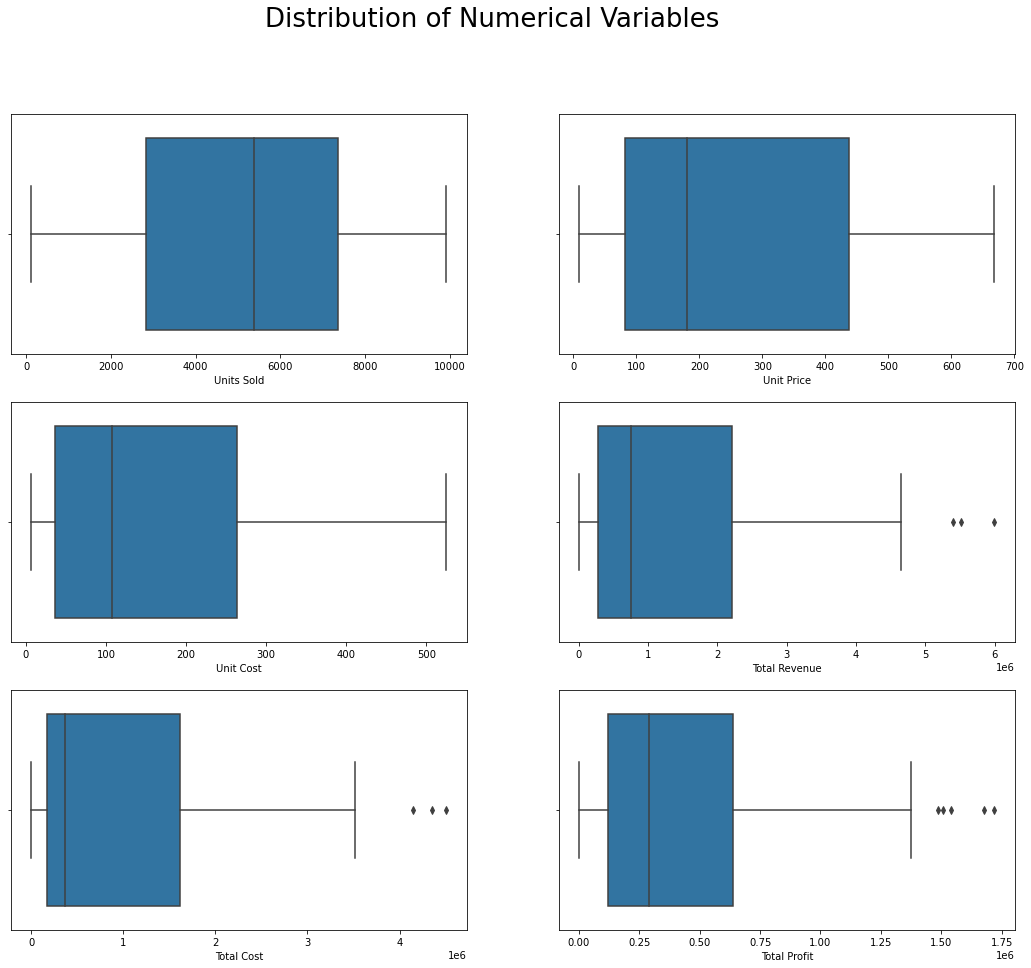

In [19]:
# Visualization of Numerical variables Distribution

fig, axes = plt.subplots(3,2, figsize=(18,15))
fig.suptitle('Distribution of Numerical Variables \n', fontsize=26);


# Units Sold
sns.boxplot(x='Units Sold', data = inp1, ax=axes[0,0])

# Unit Price
sns.boxplot(x='Unit Price', data = inp1, ax=axes[0,1])

# Unit Cost
sns.boxplot(x='Unit Cost', data = inp1, ax=axes[1,0])

# Total revenue
sns.boxplot(x='Total Revenue', data = inp1, ax=axes[1,1])

# Total Cost
sns.boxplot(x='Total Cost', data = inp1, ax=axes[2,0])

# Total Profit
sns.boxplot(x='Total Profit', data = inp1, ax=axes[2,1])

In [20]:
# Units Sold : No presence of outliers. The number of units sold range between 124 - 9925 units with a mean of 5129 units sold.
# Unit Price : No presence of outliers. The unit price ranges between 9 - 668  with a mean value of 277.
# Unit Cost : Presence of outliers. The unit cost ranges between 7 - 525 with a mean value of 191.
# Total Revenue : Presence of outliers. The total revenue ranges between 4870 - 6 million with a mean value of 1.37 million.
# Total Cost : Presence of outliers. The total cost ranges between 3612 - 4.5 million with a mean value of 931805.
# Total Profit : Presence of outliers. The total profit ranges between 1258 - 1.7 million  with a mean value of 441682.

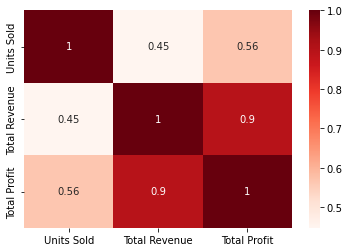

In [21]:
sns.heatmap(df[['Units Sold','Total Revenue','Total Profit']].corr(),annot=True,cmap='Reds')
plt.show()

In [22]:
#  variable 'Units Sold' & 'Total Revenue' variable are highly correlated.

In [23]:
inp1['Units Sold'].describe()

count     100.000000
mean     5128.710000
std      2794.484562
min       124.000000
25%      2836.250000
50%      5382.500000
75%      7369.000000
max      9925.000000
Name: Units Sold, dtype: float64

In [24]:
inp1['Unit Price'].describe()

count    100.000000
mean     276.761300
std      235.592241
min        9.330000
25%       81.730000
50%      179.880000
75%      437.200000
max      668.270000
Name: Unit Price, dtype: float64

In [25]:
inp1['Unit Cost'].describe()

count    100.000000
mean     191.048000
std      188.208181
min        6.920000
25%       35.840000
50%      107.275000
75%      263.330000
max      524.960000
Name: Unit Cost, dtype: float64

In [26]:
inp1['Total Revenue'].describe()

count    1.000000e+02
mean     1.373488e+06
std      1.460029e+06
min      4.870260e+03
25%      2.687212e+05
50%      7.523144e+05
75%      2.212045e+06
max      5.997055e+06
Name: Total Revenue, dtype: float64

In [27]:
inp1['Total Cost'].describe()

count    1.000000e+02
mean     9.318057e+05
std      1.083938e+06
min      3.612240e+03
25%      1.688680e+05
50%      3.635664e+05
75%      1.613870e+06
max      4.509794e+06
Name: Total Cost, dtype: float64

In [28]:
inp1['Total Profit'].describe()

count    1.000000e+02
mean     4.416820e+05
std      4.385379e+05
min      1.258020e+03
25%      1.214436e+05
50%      2.907680e+05
75%      6.358288e+05
max      1.719922e+06
Name: Total Profit, dtype: float64

In [29]:
df = inp1['Country'].value_counts()

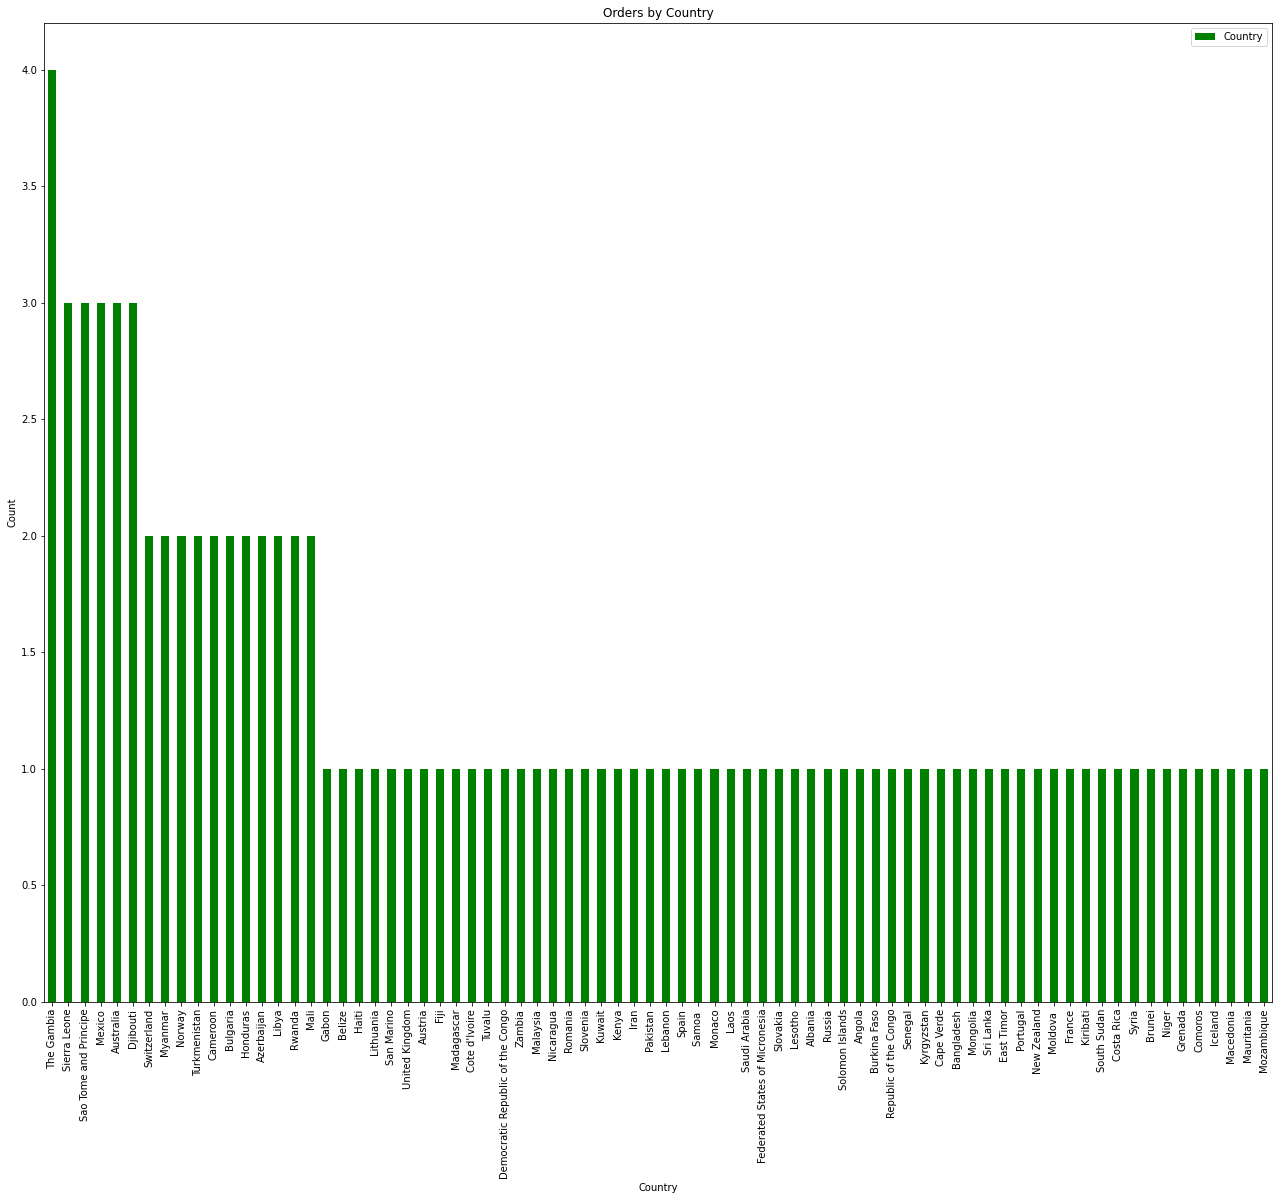

In [30]:
fig, ax = plt.subplots(figsize=(22, 18))
df.plot(kind='bar',color=['green'],ax=ax)
plt.title('Orders by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(loc='upper right');

In [31]:
df = inp1['Region'].value_counts()

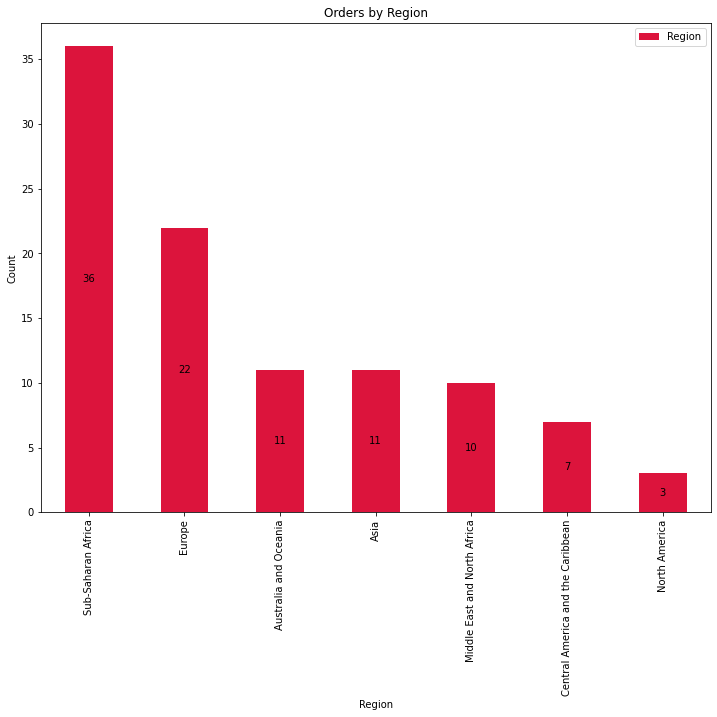

In [32]:
fig, ax = plt.subplots(figsize=(12, 9))
df.plot(kind='bar',color=['crimson'],ax=ax)
plt.title('Orders by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(loc='upper right');

# Data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

In [33]:
# Region Sub-Saharan Africa has the maximum number of orders '36' followed by Europe '22'.

In [34]:
df = inp1['Item Type'].value_counts()

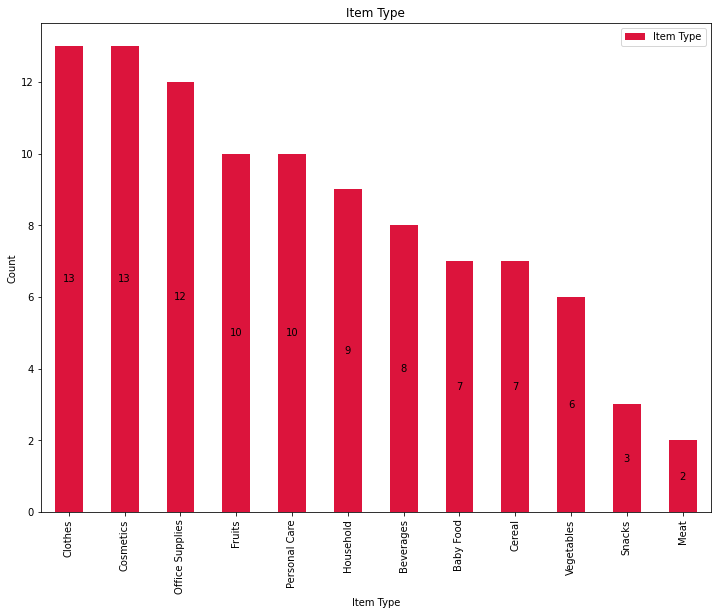

In [35]:
fig, ax = plt.subplots(figsize=(12, 9))
df.plot(kind='bar',color=['crimson'],ax=ax)
plt.title('Item Type')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.legend(loc='upper right');

# Data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

In [36]:
# Item type 'Clothes' & 'Cosmetics' with 13 each were the most ordered across all regions and years.

In [37]:
df = inp1['Item Type'].value_counts(normalize=True)*100

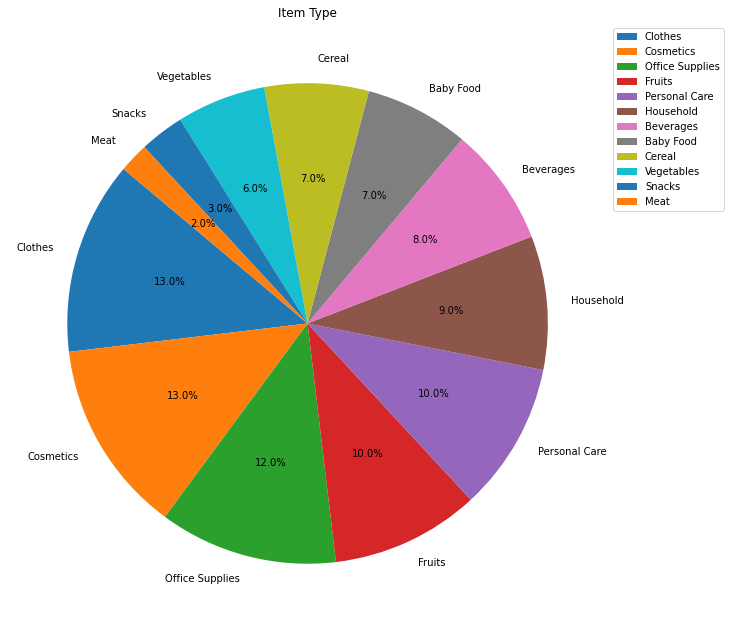

In [38]:
fig, ax = plt.subplots(figsize=(12, 9))
df.plot(kind='pie',ax=ax,autopct='%1.1f%%', startangle=140)
plt.title('Item Type')
plt.ylabel('')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.75, 1]);

In [39]:
df = inp1['Sales Channel'].value_counts(normalize=True)*100
print(df)

Offline    50.0
Online     50.0
Name: Sales Channel, dtype: float64


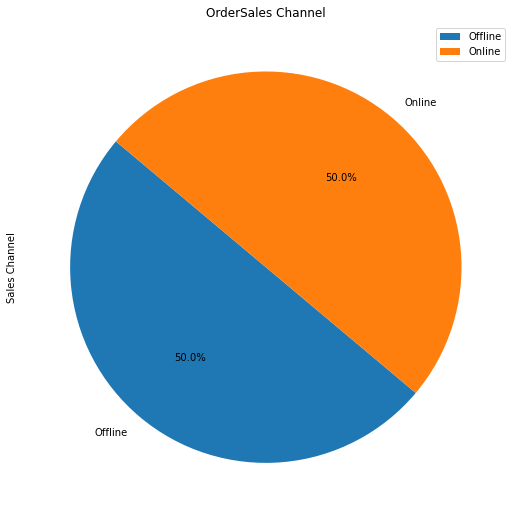

In [40]:
fig, ax = plt.subplots(figsize=(12, 9))
df.plot(kind='pie',ax=ax,autopct='%1.1f%%', startangle=140)
plt.title('OrderSales Channel')
plt.legend(loc='upper right');

In [41]:
# Sales channel both online and offline were used equally(50%) to order item type.

In [42]:
df = inp1['Order Priority'].value_counts(normalize=True)*100

In [43]:
print(df)

H    30.0
L    27.0
C    22.0
M    21.0
Name: Order Priority, dtype: float64


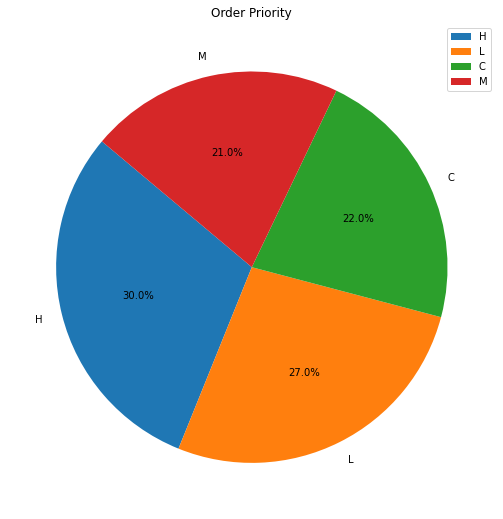

In [44]:
fig, ax = plt.subplots(figsize=(12, 9))
df.plot(kind='pie',ax=ax,autopct='%1.1f%%', startangle=140)
plt.title('Order Priority')
plt.ylabel('')
plt.legend(loc='upper right');

In [45]:
# Order priority H was the max with 30% followed by L which was 27%.M was the least with 21%.

In [46]:
max_profit_row = inp1.sort_values(by='Total Profit', ascending=False).iloc[0]

In [47]:
max_profit_country = max_profit_row['Country']

In [48]:
print(max_profit_country)

Pakistan


In [49]:
print(max_profit_row)

Region            Middle East and North Africa
Country                               Pakistan
Item Type                            Cosmetics
Sales Channel                          Offline
Order Priority                               L
Order Date                            7/5/2013
Order Year                                2013
Order Quarter                                3
Order Month                                  7
Order ID                             231145322
Ship Date                            8/16/2013
Units Sold                                9892
Unit Price                               437.2
Unit Cost                               263.33
Total Revenue                        4324782.4
Total Cost                          2604860.36
Total Profit                        1719922.04
Name: 74, dtype: object


In [50]:
# Maximum profit for a individual item type was for cosmetics in region  Middle East and North Africa 
#and country Pakistan with a total profit of 1719922.04.

In [51]:
min_profit_row = inp1.sort_values(by='Total Profit', ascending=True).iloc[0]

In [52]:
min_profit_country = min_profit_row['Country']

In [53]:
print(min_profit_country)

Kuwait


In [54]:
print(min_profit_row)

Region            Middle East and North Africa
Country                                 Kuwait
Item Type                               Fruits
Sales Channel                           Online
Order Priority                               M
Order Date                           4/30/2012
Order Year                                2012
Order Quarter                                2
Order Month                                  4
Order ID                             513417565
Ship Date                            5/18/2012
Units Sold                                 522
Unit Price                                9.33
Unit Cost                                 6.92
Total Revenue                          4870.26
Total Cost                             3612.24
Total Profit                           1258.02
Name: 88, dtype: object


In [55]:
# Minimum profit for a individual item type was for 'Fruits' in region 'Middle East and North Africa', 
#country  'Kuwait' with a total profit of '1258.02'.

In [56]:
max_UnitsSold_row =inp1.sort_values(by='Units Sold', ascending=False).iloc[0]

In [57]:
print(max_UnitsSold_row)

Region            Australia and Oceania
Country                          Tuvalu
Item Type                     Baby Food
Sales Channel                   Offline
Order Priority                        H
Order Date                    5/28/2010
Order Year                         2010
Order Quarter                         2
Order Month                           5
Order ID                      669165933
Ship Date                     6/27/2010
Units Sold                         9925
Unit Price                       255.28
Unit Cost                        159.42
Total Revenue                 2533654.0
Total Cost                    1582243.5
Total Profit                   951410.5
Name: 0, dtype: object


In [58]:
# Maximum units sold for a individual item type was for "Baby food" in region "Australia and Oceania", 
#country 'Tuvalu' with total units sold '9925' .

In [59]:
min_UnitsSold_row =inp1.sort_values(by='Units Sold', ascending=True).iloc[0]

In [60]:
min_UnitsSold_country = min_UnitsSold_row['Country']

In [61]:
print(min_UnitsSold_country)

Kyrgyzstan


In [62]:
print(min_UnitsSold_row)

Region                  Asia
Country           Kyrgyzstan
Item Type         Vegetables
Sales Channel         Online
Order Priority             H
Order Date         6/24/2011
Order Year              2011
Order Quarter              2
Order Month                6
Order ID           814711606
Ship Date          7/12/2011
Units Sold               124
Unit Price            154.06
Unit Cost              90.93
Total Revenue       19103.44
Total Cost          11275.32
Total Profit         7828.12
Name: 10, dtype: object


In [63]:
# Minimum units sold for a individual item type was for 'vegetables' in region 'Asia', 
#country  'Kyrgyzstan' with total units sold '124' .

In [64]:
max_Revenue_row = inp1.sort_values(by='Total Revenue', ascending=False).iloc[0]

In [65]:
max_Revenue_country = max_Revenue_row['Country']

In [66]:
print(max_Revenue_country)

Honduras


In [67]:
print(max_Revenue_row)

Region            Central America and the Caribbean
Country                                    Honduras
Item Type                                 Household
Sales Channel                               Offline
Order Priority                                    H
Order Date                                 2/8/2017
Order Year                                     2017
Order Quarter                                     1
Order Month                                       2
Order ID                                  522840487
Ship Date                                 2/13/2017
Units Sold                                     8974
Unit Price                                   668.27
Unit Cost                                    502.54
Total Revenue                            5997054.98
Total Cost                               4509793.96
Total Profit                             1487261.02
Name: 13, dtype: object


In [68]:
# Maximum revenue for a individual item type was for 'Household' in region 'Central America and the Caribbean', 
#country 'Honduras' with total Revenue of '5997054.98' .

In [69]:
min_Revenue_row = inp1.sort_values(by='Total Revenue', ascending=True).iloc[0]

In [70]:
min_Revenue_country = min_Revenue_row['Country']

In [71]:
print(min_Revenue_country)

Kuwait


In [72]:
print(min_Revenue_row)

Region            Middle East and North Africa
Country                                 Kuwait
Item Type                               Fruits
Sales Channel                           Online
Order Priority                               M
Order Date                           4/30/2012
Order Year                                2012
Order Quarter                                2
Order Month                                  4
Order ID                             513417565
Ship Date                            5/18/2012
Units Sold                                 522
Unit Price                                9.33
Unit Cost                                 6.92
Total Revenue                          4870.26
Total Cost                             3612.24
Total Profit                           1258.02
Name: 88, dtype: object


In [73]:
# Minimum revenue for a individual item type was for ' Fruits' in region ' Middle East and North Africa', 
#country 'Kuwait' with total Revenue of '4870.26' .

In [74]:
max_Cost_row = inp1.sort_values(by='Unit Cost', ascending=False).iloc[0]

In [75]:
max_Cost_country = max_Cost_row['Country']

In [76]:
print(max_Cost_country)

Brunei


In [77]:
print(max_Cost_row)

Region                       Asia
Country                    Brunei
Item Type         Office Supplies
Sales Channel              Online
Order Priority                  L
Order Date               4/1/2012
Order Year                   2012
Order Quarter                   2
Order Month                     4
Order ID                320009267
Ship Date                5/8/2012
Units Sold                   6708
Unit Price                 651.21
Unit Cost                  524.96
Total Revenue          4368316.68
Total Cost             3521431.68
Total Profit             846885.0
Name: 38, dtype: object


In [78]:
# Maximum Unit Cost for a individual item type was for 'Office Supplies' in region 'Asia', 
#country ' Brunei' with Unit Cost of '524.96' .

In [79]:
min_Cost_row = inp1.sort_values(by='Unit Cost', ascending=True).iloc[0]

In [80]:
min_Cost_country = min_Cost_row['Country']

In [81]:
print(min_Cost_country)

Sao Tome and Principe


In [82]:
print(min_Cost_row)

Region               Sub-Saharan Africa
Country           Sao Tome and Principe
Item Type                        Fruits
Sales Channel                   Offline
Order Priority                        H
Order Date                    9/17/2013
Order Year                         2013
Order Quarter                         3
Order Month                           9
Order ID                      508980977
Ship Date                    10/24/2013
Units Sold                         7637
Unit Price                         9.33
Unit Cost                          6.92
Total Revenue                  71253.21
Total Cost                     52848.04
Total Profit                   18405.17
Name: 54, dtype: object


In [83]:
# Minimum Unit Cost for a individual item type was for 'Fruits' in region ' Sub-Saharan Africa', 
#country ' Sao Tome and Principe' with Unit Cost of '6.92' .

In [84]:
max_Price_row = inp1.sort_values(by='Unit Price', ascending=False).iloc[0]

In [85]:
max_Price_country = max_Price_row['Country']

In [86]:
print(max_Price_country)

Mozambique


In [87]:
print(max_Price_row)

Region            Sub-Saharan Africa
Country                   Mozambique
Item Type                  Household
Sales Channel                Offline
Order Priority                     L
Order Date                 2/10/2012
Order Year                      2012
Order Quarter                      1
Order Month                        2
Order ID                   665095412
Ship Date                  2/15/2012
Units Sold                      5367
Unit Price                    668.27
Unit Cost                     502.54
Total Revenue             3586605.09
Total Cost                2697132.18
Total Profit               889472.91
Name: 99, dtype: object


In [88]:
# Maximum Unit Price for a individual item type was for 'Household' in region 'Sub-Saharan Africa', 
#country ' Mozambique' with Unit Price of ' 668.27' .

In [89]:
min_Price_row = inp1.sort_values(by='Unit Price', ascending=True).iloc[0]

In [90]:
min_Price_country = min_Price_row['Country']

In [91]:
print(min_Price_country)

New Zealand


In [92]:
print(min_Price_row)

Region            Australia and Oceania
Country                     New Zealand
Item Type                        Fruits
Sales Channel                    Online
Order Priority                        H
Order Date                     9/8/2014
Order Year                         2014
Order Quarter                         3
Order Month                           9
Order ID                      142278373
Ship Date                     10/4/2014
Units Sold                         2187
Unit Price                         9.33
Unit Cost                          6.92
Total Revenue                  20404.71
Total Cost                     15134.04
Total Profit                    5270.67
Name: 23, dtype: object


In [93]:
# Minimum Unit Price for a individual item type was for 'Fruits' in region '  Australia and Oceania', 
#country 'New Zealand' with Unit Price of '9.33'.

In [94]:
inp1['Order ID'].value_counts().sum()

100

In [95]:
data = inp1.groupby(['Region'])[['Total Revenue']].sum()
data_sorted_desc = data.sort_values(by = 'Total Revenue',ascending = False)
print(data_sorted_desc)

                                   Total Revenue
Region                                          
Sub-Saharan Africa                   39672031.43
Europe                               33368932.11
Asia                                 21347091.02
Australia and Oceania                14094265.13
Middle East and North Africa         14052706.58
Central America and the Caribbean     9170385.49
North America                         5643356.55


In [96]:
# Region 'Sub-Saharan Africa' has the most 'Total Revenue' of '39672031.43' across all the years.

In [97]:
data.index

Index(['Asia', 'Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Middle East and North Africa', 'North America',
       'Sub-Saharan Africa'],
      dtype='object', name='Region')

In [98]:
data['Total Revenue']

Region
Asia                                 21347091.02
Australia and Oceania                14094265.13
Central America and the Caribbean     9170385.49
Europe                               33368932.11
Middle East and North Africa         14052706.58
North America                         5643356.55
Sub-Saharan Africa                   39672031.43
Name: Total Revenue, dtype: float64

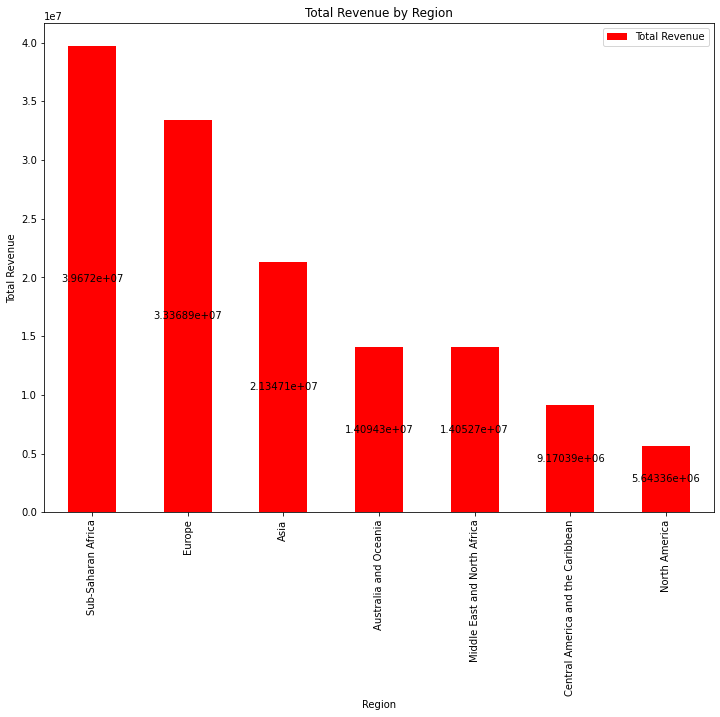

In [99]:
fig, ax = plt.subplots(figsize=(12, 9))
data_sorted_desc.plot(kind='bar',color=['red'],ax=ax)
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.legend(loc='upper right');

# Data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

In [100]:
df_0 = inp1.groupby(['Region'])[['Units Sold']].sum()
df_0_sorted_desc = df_0.sort_values(by = 'Units Sold',ascending = False)
print(df_0_sorted_desc)

                                   Units Sold
Region                                       
Sub-Saharan Africa                     182870
Europe                                  98117
Australia and Oceania                   68325
Asia                                    59967
Middle East and North Africa            48678
Central America and the Caribbean       35771
North America                           19143


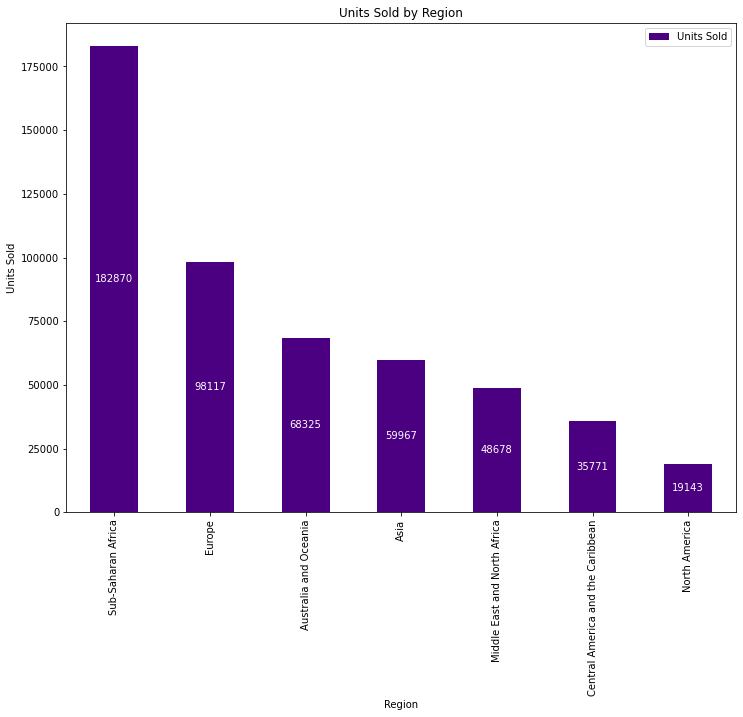

In [101]:
fig, ax = plt.subplots(figsize=(12, 9))
df_0_sorted_desc.plot(kind='bar',color=['indigo'],ax=ax)
plt.title('Units Sold by Region')
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.legend(loc='upper right');

# Data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center',color ='white')

In [102]:
# Region 'Sub-Saharan Africa' sold the most number of units '182870' across all the years.

In [103]:
df_0 = inp1.groupby(['Region'])[['Units Sold']].sum()
df_0['Units Sold'] = (df_0['Units Sold'] / df_0['Units Sold'].sum()) * 100
df_0_sorted_desc = df_0.sort_values(by = 'Units Sold',ascending = False)
df_0_sorted_desc = df_0_sorted_desc.round(2)
print(df_0_sorted_desc)

                                   Units Sold
Region                                       
Sub-Saharan Africa                      35.66
Europe                                  19.13
Australia and Oceania                   13.32
Asia                                    11.69
Middle East and North Africa             9.49
Central America and the Caribbean        6.97
North America                            3.73


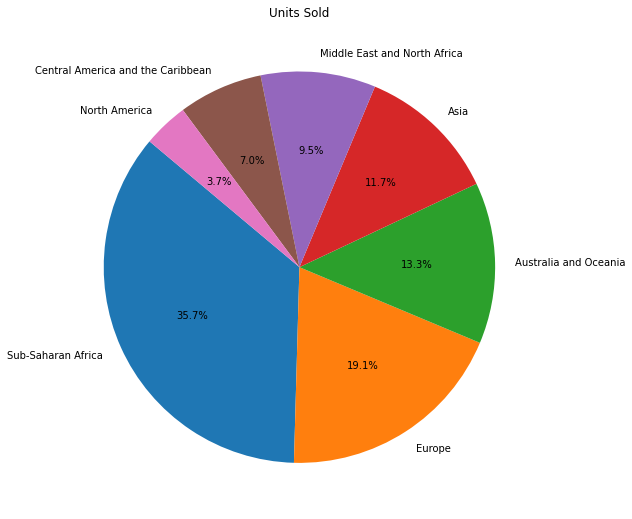

In [104]:
fig, ax = plt.subplots(figsize=(12, 9))
df_0_sorted_desc.plot(kind='pie', y='Units Sold', ax=ax, autopct='%1.1f%%', startangle=140, legend=False)
plt.title('Units Sold')
plt.ylabel('')  
plt.show()

In [105]:
# Region 'Sub-Saharan Africa' sold the most number of units with a share of  '35.7%' across all the years.

In [106]:
df_1 = inp1.groupby(['Region'])[['Total Profit']].sum()
df_1_sorted_desc = df_1.sort_values(by = 'Total Profit',ascending = False)
print(df_1_sorted_desc)

                                   Total Profit
Region                                         
Sub-Saharan Africa                  12183211.40
Europe                              11082938.63
Asia                                 6113845.87
Middle East and North Africa         5761191.86
Australia and Oceania                4722160.03
Central America and the Caribbean    2846907.85
North America                        1457942.76


In [107]:
df_1.index

Index(['Asia', 'Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Middle East and North Africa', 'North America',
       'Sub-Saharan Africa'],
      dtype='object', name='Region')

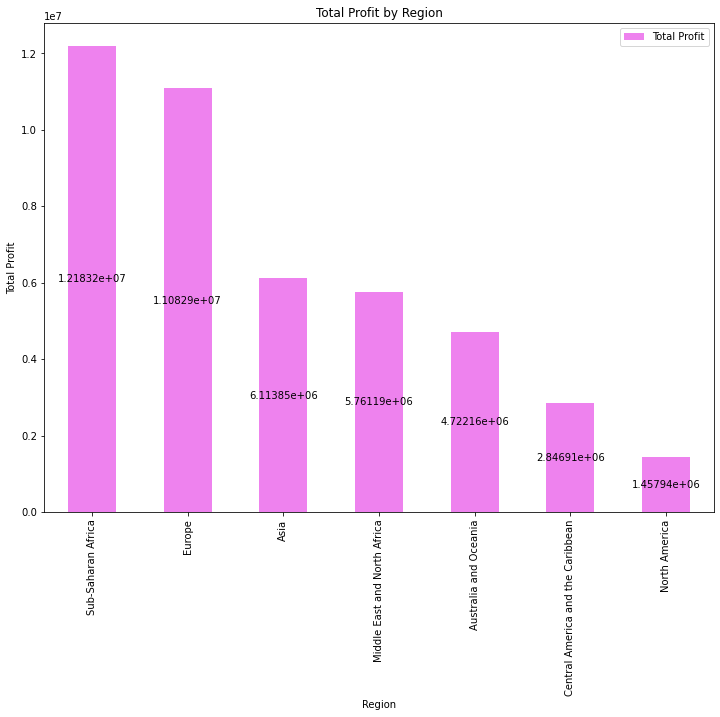

In [108]:
fig, ax = plt.subplots(figsize=(12, 9))
df_1_sorted_desc.plot(kind='bar',color=['violet'],ax=ax)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.legend(loc='upper right');

# Data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

In [109]:
# Region 'Sub-Saharan Africa' made the highest profit of '12183211.40' across all the years.

In [110]:
df_2 = inp1.groupby(['Region'])[['Order ID']].count()
df_2_sorted_desc = df_2.sort_values(by = 'Order ID',ascending = False)
print(df_2_sorted_desc)

                                   Order ID
Region                                     
Sub-Saharan Africa                       36
Europe                                   22
Asia                                     11
Australia and Oceania                    11
Middle East and North Africa             10
Central America and the Caribbean         7
North America                             3


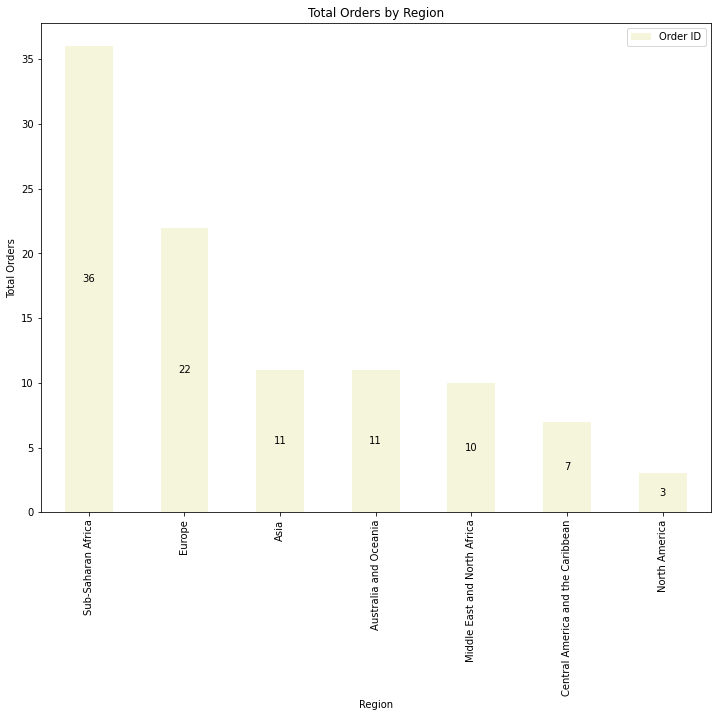

In [111]:
fig, ax = plt.subplots(figsize=(12, 9))
df_2_sorted_desc.plot(kind='bar',color=['Beige'],ax=ax)
plt.title('Total Orders by Region')
plt.xlabel('Region')
plt.ylabel('Total Orders')
plt.legend(loc='upper right');

# Data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

In [112]:
# Region 'Sub-Saharan Africa' had the highest number of orders of '36' across all the years.

In [113]:
df_3 = inp1.groupby(['Region'])[['Total Cost']].sum()
df_3_sorted_desc = df_3.sort_values(by = 'Total Cost',ascending = False)
print(df_3_sorted_desc)

                                    Total Cost
Region                                        
Sub-Saharan Africa                 27488820.03
Europe                             22285993.48
Asia                               15233245.15
Australia and Oceania               9372105.10
Middle East and North Africa        8291514.72
Central America and the Caribbean   6323477.64
North America                       4185413.79


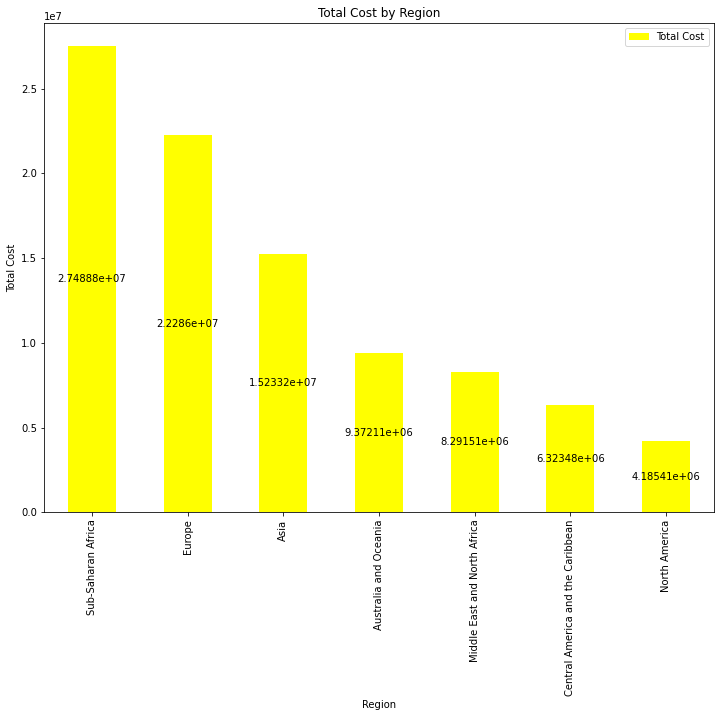

In [114]:
fig, ax = plt.subplots(figsize=(12, 9))
df_3_sorted_desc.plot(kind='bar',color=['yellow'],ax=ax)
plt.title('Total Cost by Region')
plt.xlabel('Region')
plt.ylabel('Total Cost')
plt.legend(loc='upper right');

# Data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

In [115]:
# Region 'Sub-Saharan Africa' had the highest 'Total Cost'of '27488820.03' across all the years.

In [116]:
df_4 = inp1.groupby(['Region'])[['Unit Price']].sum()
df_4_sorted_desc = df_4.sort_values(by = 'Unit Price',ascending = False)
print(df_4_sorted_desc)

                                   Unit Price
Region                                       
Sub-Saharan Africa                    9346.28
Europe                                7237.55
Asia                                  3693.90
Australia and Oceania                 2449.40
Middle East and North Africa          2415.06
Central America and the Caribbean     1702.21
North America                          831.73


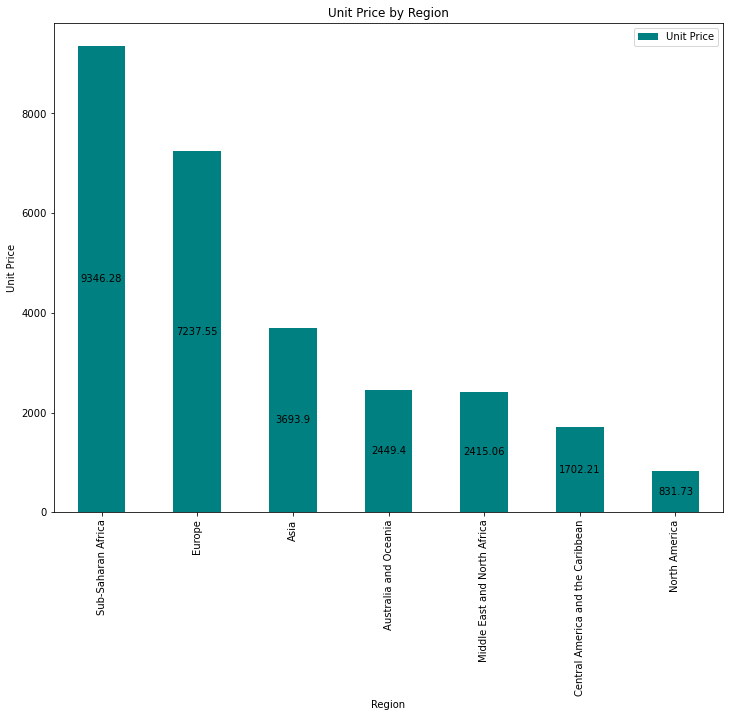

In [117]:
fig, ax = plt.subplots(figsize=(12, 9))
df_4_sorted_desc.plot(kind='bar',color=['Teal'],ax=ax)
plt.title('Unit Price by Region')
plt.xlabel('Region')
plt.ylabel('Unit Price')
plt.legend(loc='upper right');

# Data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

In [118]:
# Region 'Sub-Saharan Africa' had the highest 'Unit Price'of '9346.28' across all the years.

In [119]:
df_5 = inp1.groupby(['Order Year'])[['Units Sold']].sum()
df_5_sorted_desc = df_5.sort_values(by = 'Units Sold',ascending = False)
print(df_5_sorted_desc)

            Units Sold
Order Year            
2012             97967
2014             92040
2013             64663
2010             61571
2011             54768
2015             49480
2017             49226
2016             43156


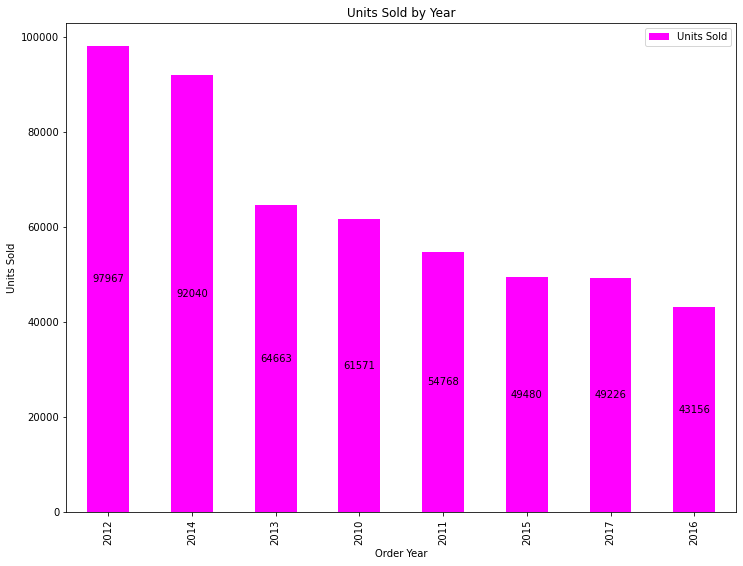

In [120]:
fig, ax = plt.subplots(figsize=(12, 9))
df_5_sorted_desc.plot(kind='bar',color=['Magenta'],ax=ax)
plt.title('Units Sold by Year')
plt.xlabel('Order Year')
plt.ylabel('Units Sold')
plt.legend(loc='upper right');

# Data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

In [121]:
# In Year '2012' maximum number of units '97967' were sold across all Regions.

In [122]:
df_6 = inp1.groupby(['Order Quarter'])[['Units Sold']].sum()
df_6_sorted_desc = df_6.sort_values(by = 'Units Sold',ascending = False)
print(df_6_sorted_desc)

               Units Sold
Order Quarter            
2                  143224
4                  124776
3                  123553
1                  121318


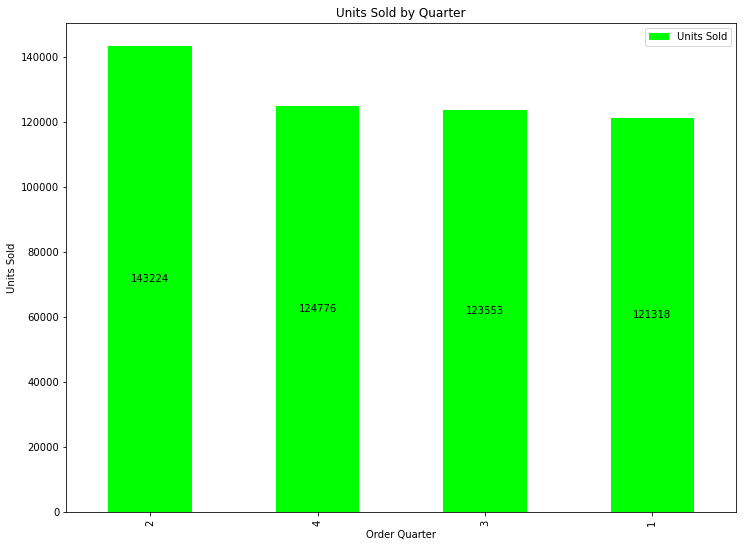

In [123]:
fig, ax = plt.subplots(figsize=(12, 9))
df_6_sorted_desc.plot(kind='bar',color=['Lime'],ax=ax)
plt.title('Units Sold by Quarter')
plt.xlabel('Order Quarter')
plt.ylabel('Units Sold')
plt.legend(loc='upper right');

# Data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

In [124]:
# In Quarter '2' - months of 'May','June','July','August' where maximum number of units '143224' were sold
#across all the 'Years' & 'Regions'.

In [125]:
df_7 = inp1.groupby(['Order Month'])[['Units Sold']].sum()
df_7_sorted_desc = df_7.sort_values(by='Units Sold', ascending=False)
print(df_7_sorted_desc)

             Units Sold
Order Month            
7                 76201
2                 71079
5                 63651
10                55472
11                53261
4                 44680
1                 35742
6                 34893
9                 30101
8                 17251
12                16043
3                 14497


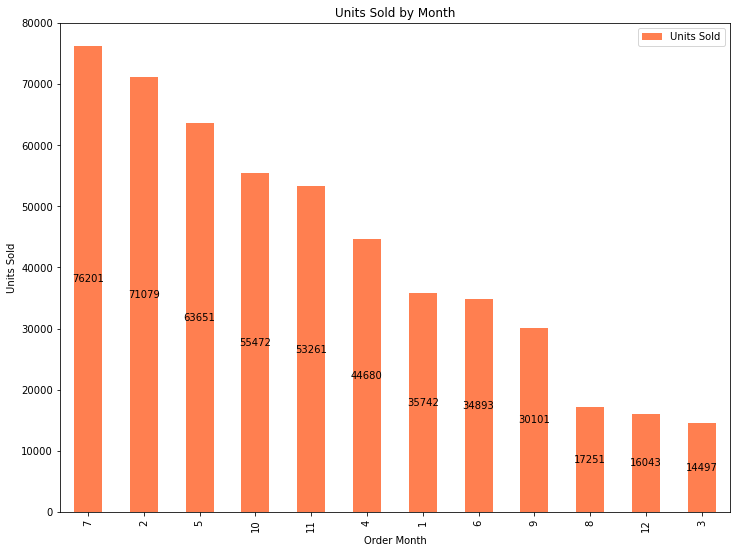

In [126]:
fig, ax = plt.subplots(figsize=(12, 9))
df_7_sorted_desc.plot(kind='bar',color=['Coral'],ax=ax)
plt.title('Units Sold by Month')
plt.xlabel('Order Month')
plt.ylabel('Units Sold')
plt.legend(loc='upper right');

# Data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

In [127]:
# In the month '7'-'July' where maximum number of units '76201' were sold across all the 'Years' & 'Regions'.

In [128]:
df_8 = inp1.groupby(['Country'])[['Units Sold']].sum()
df_8_sorted_desc = df_8.sort_values(by='Units Sold', ascending=False)
print(df_8_sorted_desc.head(10))

                       Units Sold
Country                          
Sao Tome and Principe       24568
Djibouti                    23198
Mexico                      19143
The Gambia                  14813
Myanmar                     14180
Australia                   12995
Norway                      12574
Honduras                    11199
Cameroon                    10948
Tuvalu                       9925


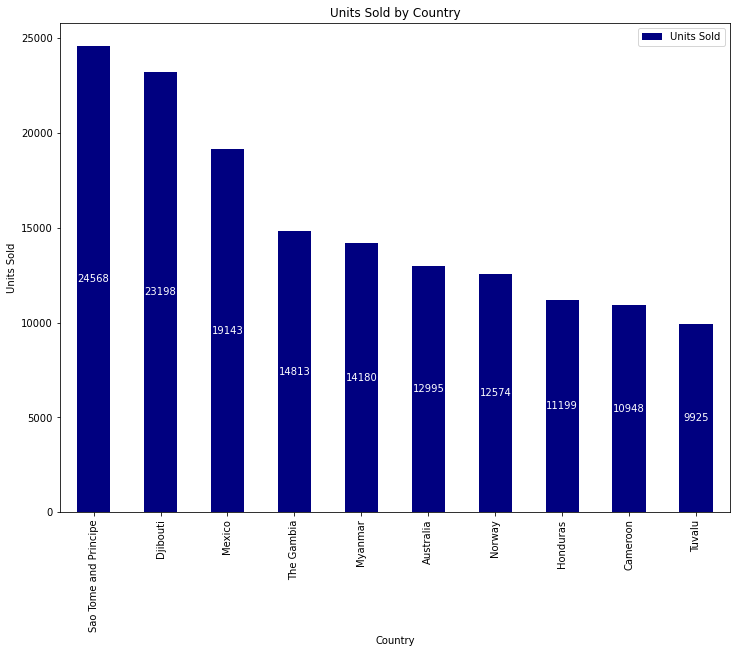

In [129]:
fig, ax = plt.subplots(figsize=(12,9))
df_8_sorted_desc.head(10).plot(kind='bar',color=['Navy'],ax=ax)
plt.title('Units Sold by Country')
plt.xlabel('Country')
plt.ylabel('Units Sold')
plt.legend(loc='upper right');

for container in ax.containers:
    ax.bar_label(container, label_type='center',color ='white')

In [130]:
# Country 'Sao Tome and Principe' maximum number of units '24568' were sold across all the 'Years'.

In [131]:
df_19 = inp1.groupby(['Country'])[['Unit Price']].sum()
df_19_sorted_desc = df_19.sort_values(by='Unit Price', ascending=False)
print(df_19_sorted_desc.head(10))

              Unit Price
Country                 
The Gambia       1551.14
Sierra Leone     1456.48
Turkmenistan     1319.48
Azerbaijan       1088.41
Rwanda           1088.41
Australia         904.36
Mexico            831.73
Honduras          820.85
Djibouti          795.48
Myanmar           777.55


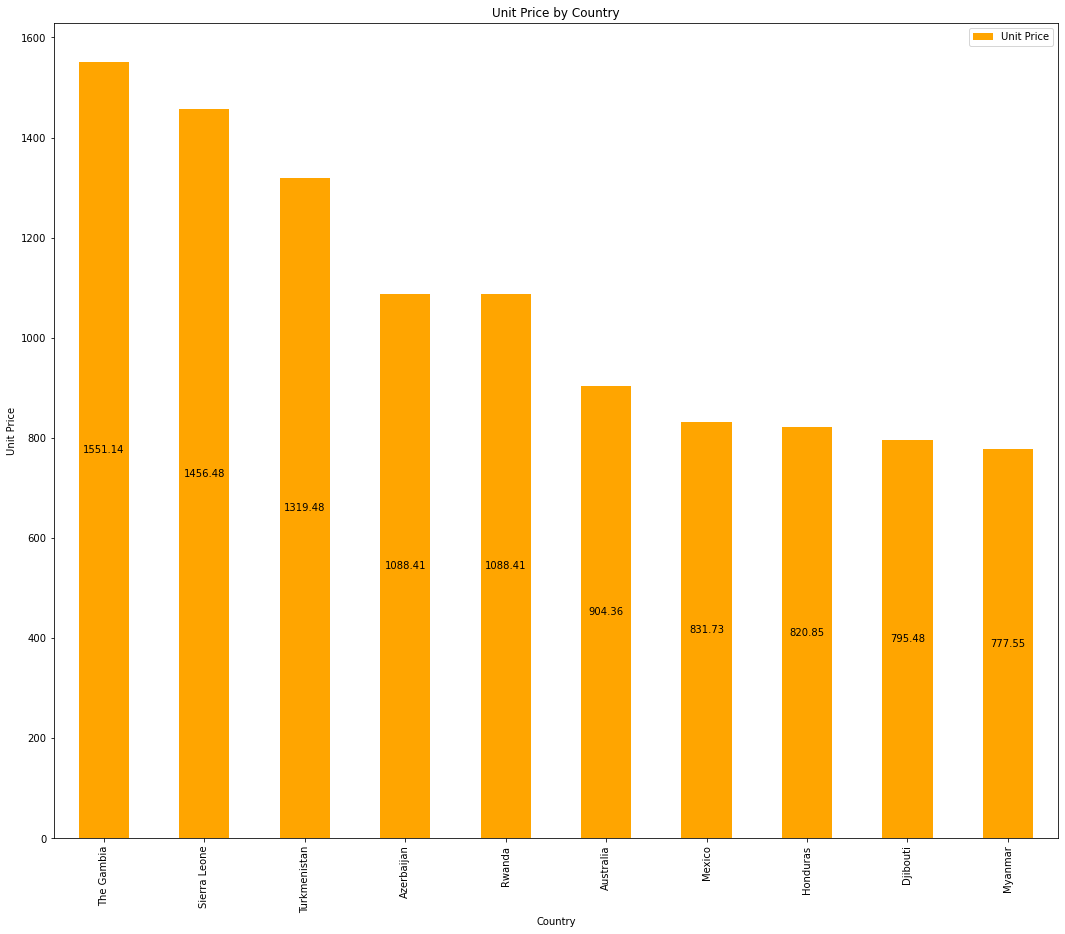

In [132]:
fig, ax = plt.subplots(figsize=(18, 15))
df_19_sorted_desc.head(10).plot(kind='bar',color=['orange'],ax=ax)
plt.title('Unit Price by Country')
plt.xlabel('Country')
plt.ylabel('Unit Price')
plt.legend(loc='upper right');

# Data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

In [133]:
# Country 'The Gamibia' had the maximum consolidated 'Unit Price' of ' 1551.14' across all the 'Years'.

In [134]:
df_20 = inp1.groupby(['Country'])[['Unit Cost']].sum()
df_20_sorted_desc = df_20.sort_values(by='Unit Cost', ascending=False)
print(df_20_sorted_desc.head(10))

              Unit Cost
Country                
The Gambia      1143.76
Sierra Leone    1140.85
Turkmenistan    1027.50
Rwanda           788.29
Azerbaijan       788.29
Australia        673.86
Mexico           615.88
Honduras         599.98
Bulgaria         560.80
Cameroon         556.75


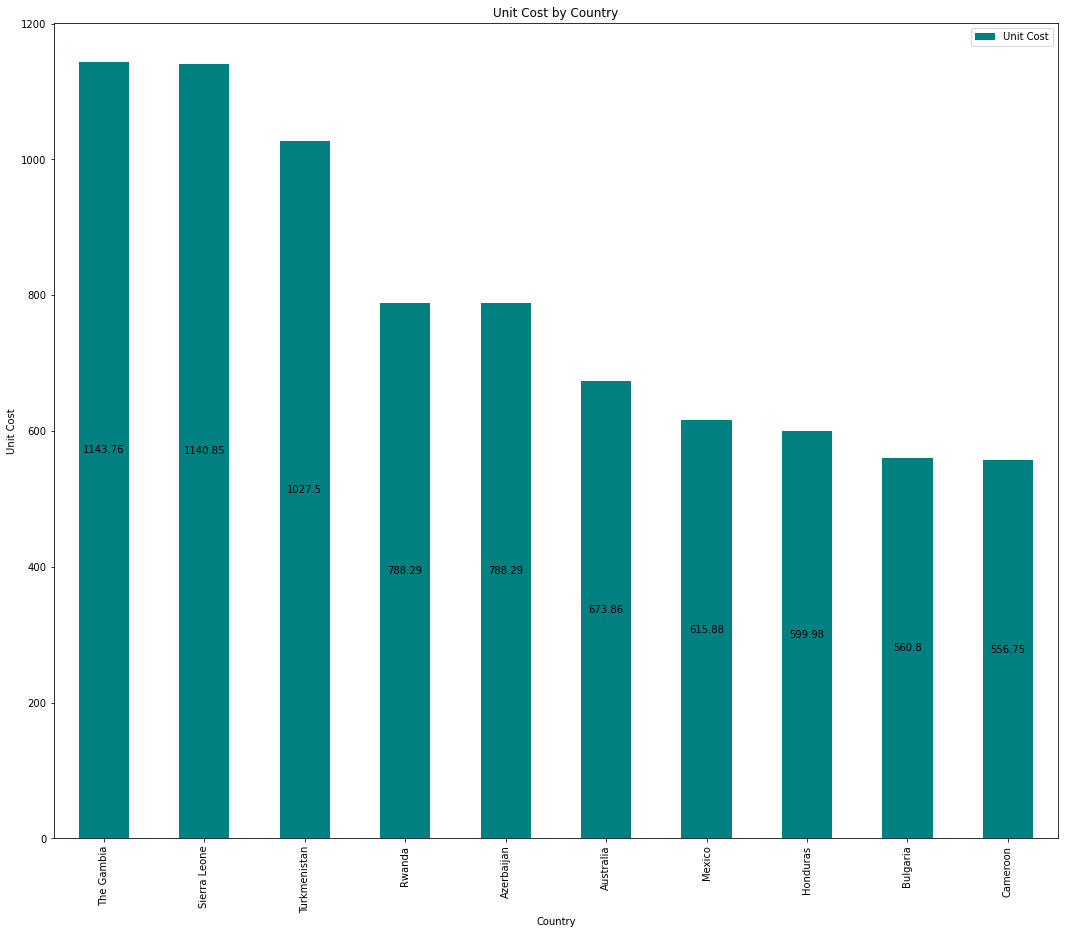

In [135]:
fig, ax = plt.subplots(figsize=(18, 15))
df_20_sorted_desc.head(10).plot(kind='bar',color=['teal'],ax=ax)
plt.title('Unit Cost by Country')
plt.xlabel('Country')
plt.ylabel('Unit Cost')
plt.legend(loc='upper right');

# Data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

In [136]:
# Country 'The Gamibia' had the maximum consolidated 'Unit Cost' of '1143.76' across all the 'Years'.

In [137]:
df_9 = inp1.groupby(['Country'])[['Total Profit']].sum()
df_9_sorted_desc = df_9.sort_values(by='Total Profit', ascending=False)
print(df_9_sorted_desc.head(10))

             Total Profit
Country                  
Djibouti       2425317.87
Myanmar        1802771.70
Pakistan       1719922.04
Samoa          1678540.98
Honduras       1609947.52
Iceland        1541705.29
Azerbaijan     1512926.83
Switzerland    1512729.45
Mexico         1457942.76
Rwanda         1417493.49


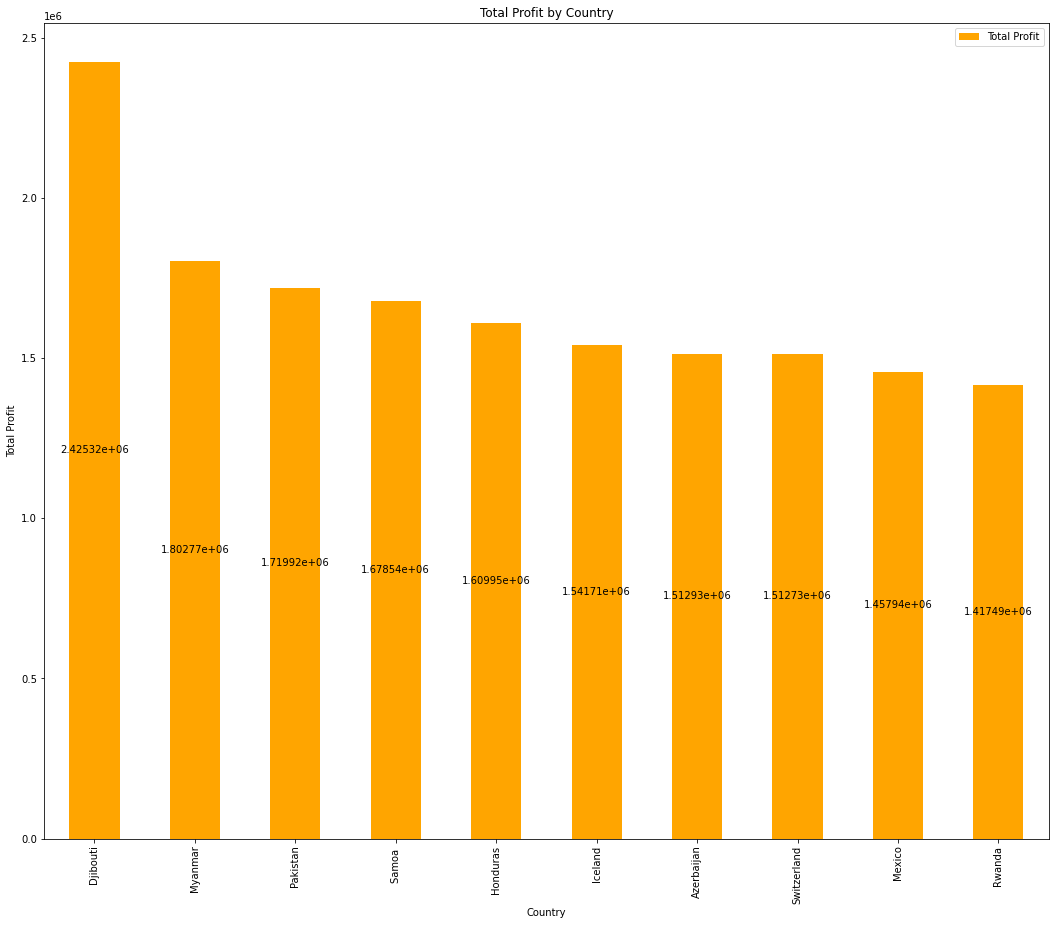

In [138]:
fig, ax = plt.subplots(figsize=(18, 15))
df_9_sorted_desc.head(10).plot(kind='bar',color=['orange'],ax=ax)
plt.title('Total Profit by Country')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.legend(loc='upper right');

# Data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

In [139]:
# Country 'Dijibouti' had the maximum consolidated 'Total Profit' of ' 2425317.87' across all the 'Years'.

In [140]:
df_9 = inp1.groupby(['Country'])[['Total Revenue']].sum()
df_9_sorted_desc = df_9.sort_values(by='Total Revenue', ascending=False)
print(df_9_sorted_desc.head(10))

              Total Revenue
Country                    
Honduras         6336545.48
Myanmar          6161257.90
Djibouti         6052890.86
Turkmenistan     5822036.20
Mexico           5643356.55
The Gambia       5449517.95
Lithuania        5396577.27
Rwanda           5253769.42
Azerbaijan       4478800.21
Brunei           4368316.68


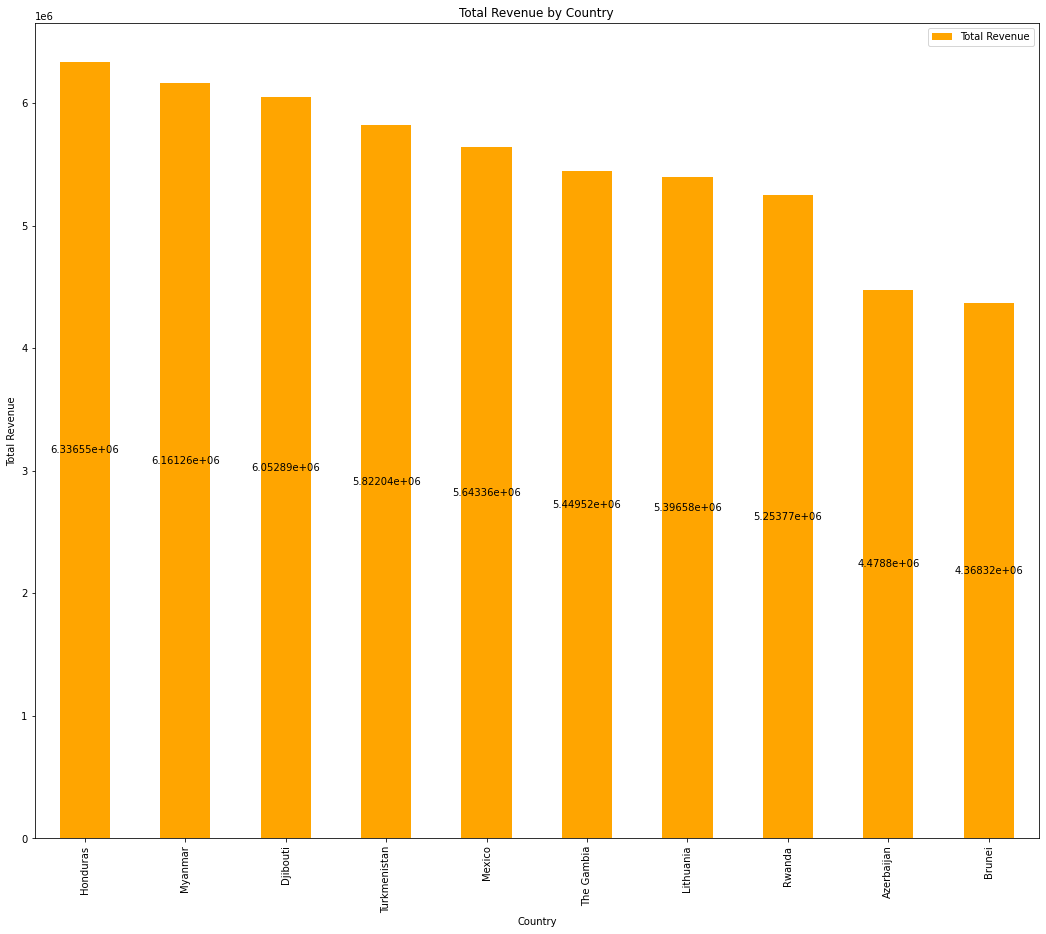

In [141]:
fig, ax = plt.subplots(figsize=(18, 15))
df_9_sorted_desc.head(10).plot(kind='bar',color=['orange'],ax=ax)
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.legend(loc='upper right');

# Data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

In [142]:
# Country 'Honduras' had the maximum consolidated 'Total Revenue' of '6336545.48' across all the 'Years'.

In [143]:
df_9 = inp1.groupby(['Country'])[['Total Cost']].sum()
df_9_sorted_desc = df_9.sort_values(by='Total Cost', ascending=False)
print(df_9_sorted_desc.head(10))

              Total Cost
Country                 
Honduras      4726597.96
Turkmenistan  4554777.80
Myanmar       4358486.20
Lithuania     4350343.52
Mexico        4185413.79
The Gambia    4063634.68
Rwanda        3836275.93
Djibouti      3627572.99
Brunei        3521431.68
Cameroon      3069348.98


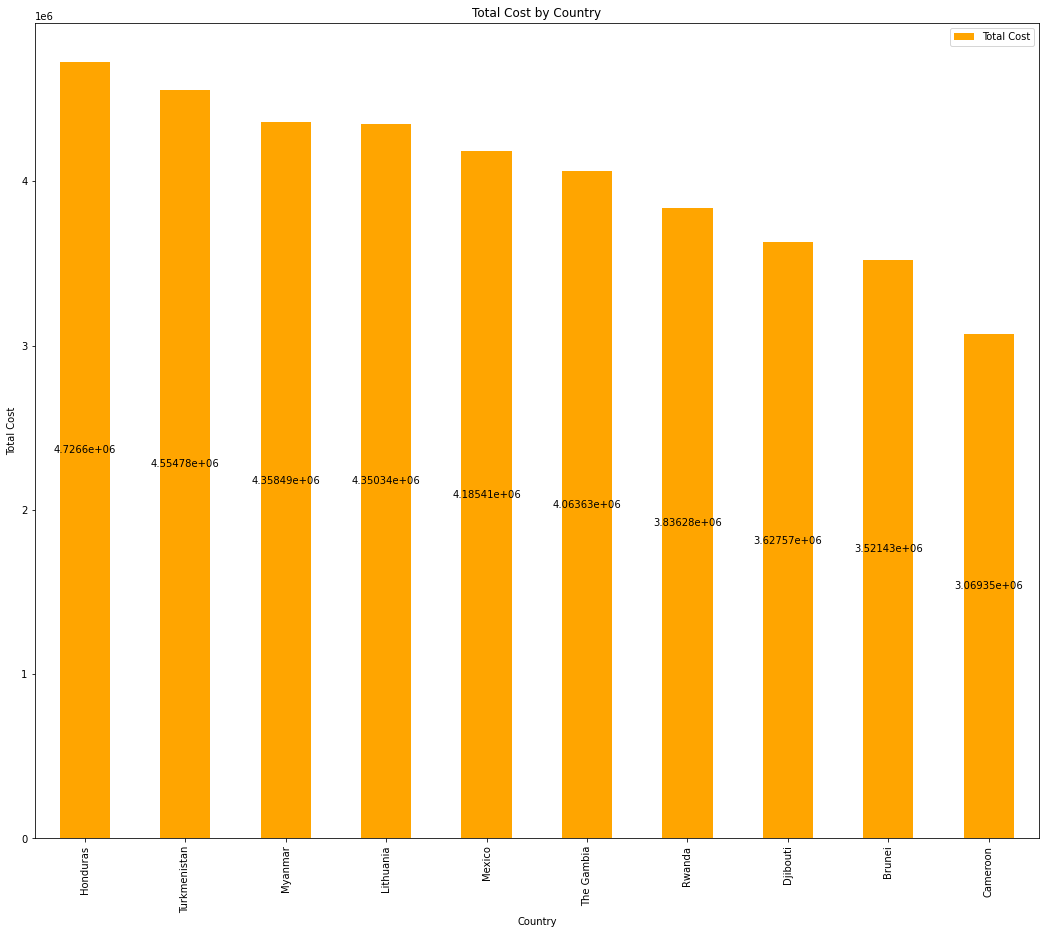

In [144]:
fig, ax = plt.subplots(figsize=(18, 15))
df_9_sorted_desc.head(10).plot(kind='bar',color=['orange'],ax=ax)
plt.title('Total Cost by Country')
plt.xlabel('Country')
plt.ylabel('Total Cost')
plt.legend(loc='upper right');

# Data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

In [145]:
# Country 'Honduras' had the maximum consolidated'Total cost' of '4726597.96' across all the 'Years'.

In [146]:
inp1['Order Date'] = pd.to_datetime(inp1['Order Date'])
inp1['Ship Date'] = pd.to_datetime(inp1['Ship Date'])

In [147]:
# Calculate the difference in days
inp1['Days Difference'] = (inp1['Ship Date'] - inp1['Order Date']).dt.days

In [148]:
print(inp1)

                               Region                           Country  \
0               Australia and Oceania                            Tuvalu   
1   Central America and the Caribbean                           Grenada   
2                              Europe                            Russia   
3                  Sub-Saharan Africa             Sao Tome and Principe   
4                  Sub-Saharan Africa                            Rwanda   
5               Australia and Oceania                   Solomon Islands   
6                  Sub-Saharan Africa                            Angola   
7                  Sub-Saharan Africa                      Burkina Faso   
8                  Sub-Saharan Africa             Republic of the Congo   
9                  Sub-Saharan Africa                           Senegal   
10                               Asia                        Kyrgyzstan   
11                 Sub-Saharan Africa                        Cape Verde   
12                       

In [149]:
df_9 = inp1.groupby(['Order Year'])[['Units Sold']].sum()
df_9 = df_9.round(2)
print(df_9)

            Units Sold
Order Year            
2010             61571
2011             54768
2012             97967
2013             64663
2014             92040
2015             49480
2016             43156
2017             49226


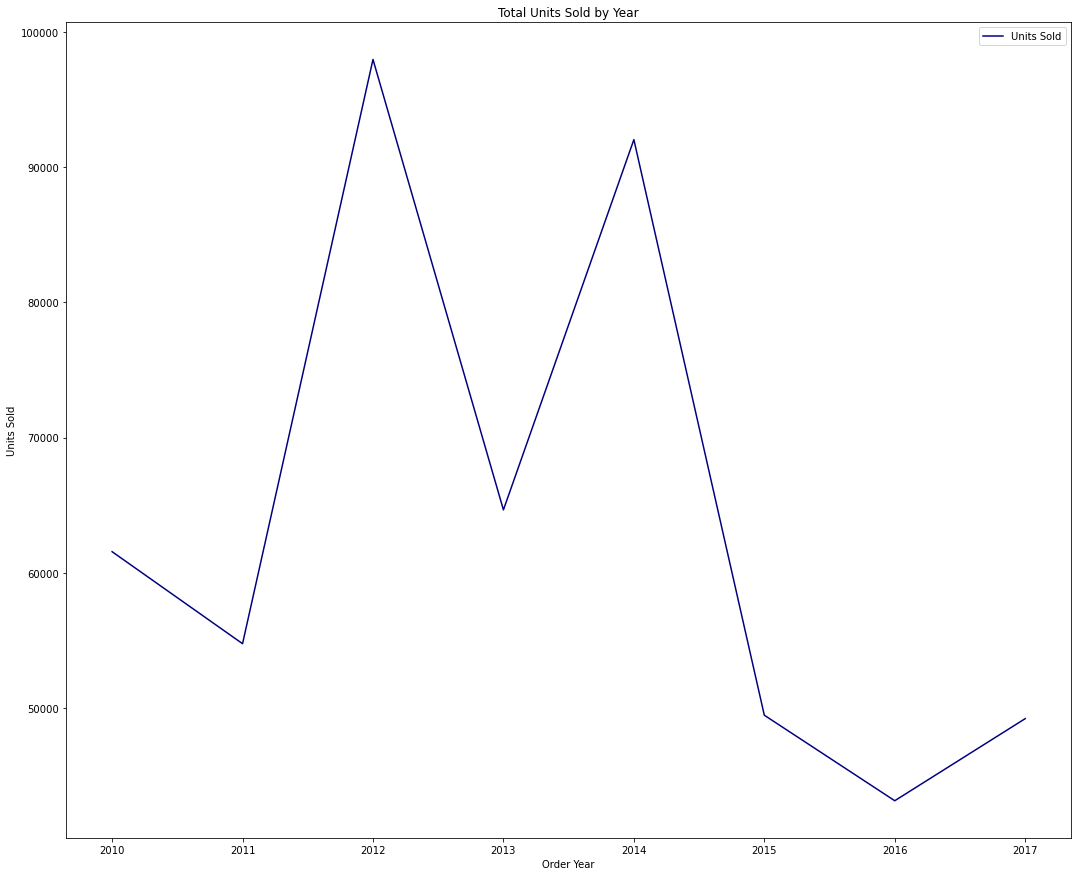

In [150]:
fig, ax = plt.subplots(figsize=(18, 15))
df_9.plot(kind='line',color=['Navy'],ax=ax)
plt.title('Total Units Sold by Year')
plt.xlabel('Order Year')
plt.ylabel('Units Sold')
plt.legend(loc='upper right');

In [151]:
# In Year '2010' maximum number of units were sold '61571'.

In [152]:
df_10 = inp1.groupby(['Order Year'])[['Unit Price']].sum()
df_10 = df_10.round(2)
print(df_10)

            Unit Price
Order Year            
2010           2868.06
2011           2701.68
2012           7766.50
2013           3818.29
2014           2943.57
2015           2706.04
2016           2713.61
2017           2158.38


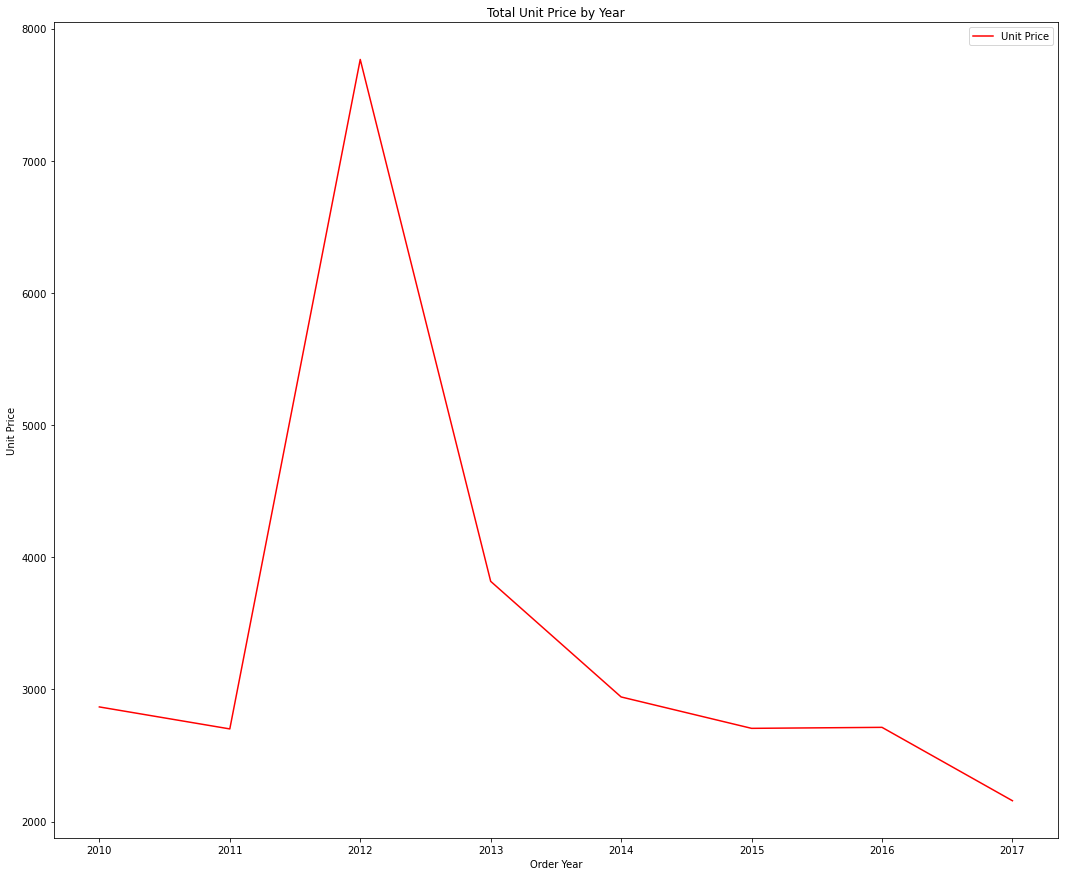

In [153]:
fig, ax = plt.subplots(figsize=(18, 15))
df_10.plot(kind='line',color=['red'],ax=ax)
plt.title('Total Unit Price by Year')
plt.xlabel('Order Year')
plt.ylabel('Unit Price')
plt.legend(loc='upper right');

In [154]:
# Year '2010' has the maximum consolidated 'Unit Price' of '2868.06'.

In [155]:
df_10 = inp1.groupby(['Order Year'])[['Unit Price']].mean()
df_10 = df_10.round(2)
print(df_10)

            Unit Price
Order Year            
2010            286.81
2011            225.14
2012            353.02
2013            318.19
2014            196.24
2015            246.00
2016            271.36
2017            269.80


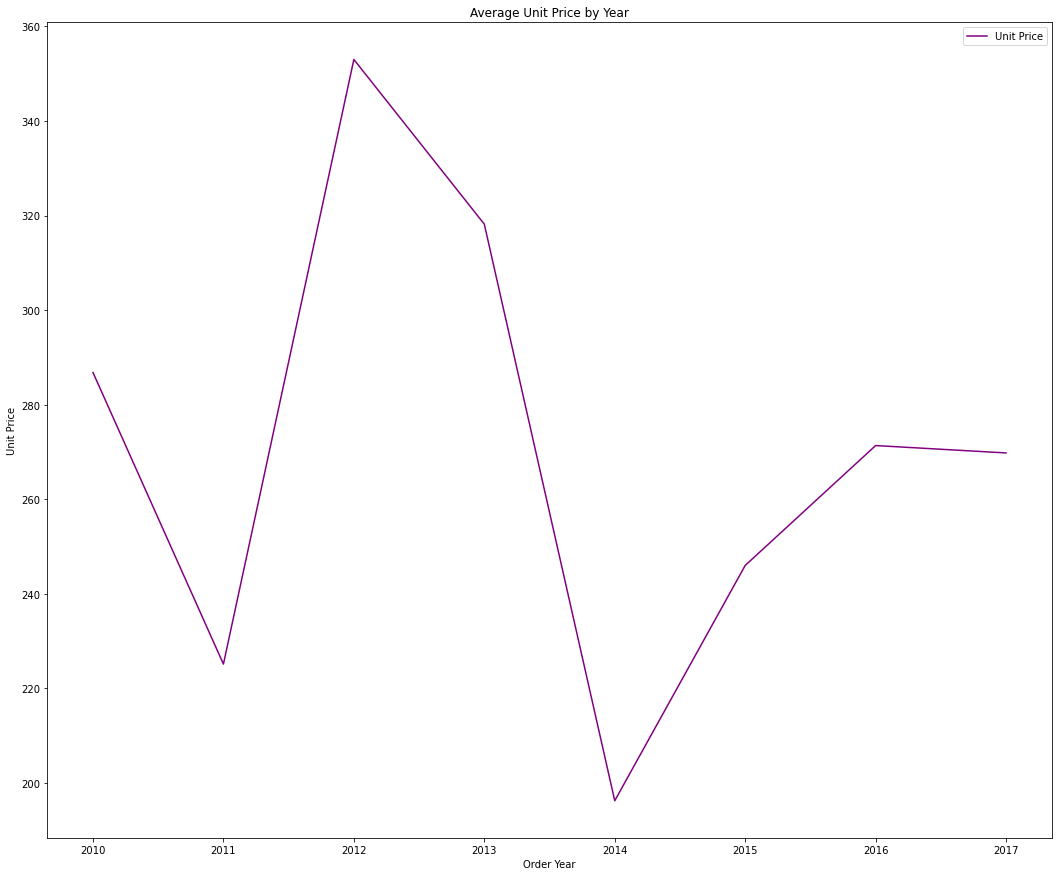

In [156]:
fig, ax = plt.subplots(figsize=(18, 15))
df_10.plot(kind='line',color=['Purple'],ax=ax)
plt.title('Average Unit Price by Year')
plt.xlabel('Order Year')
plt.ylabel('Unit Price')
plt.legend(loc='upper right');

In [157]:
# Year '2010' has an average consolidated 'Unit Price' of '286.81'.

In [158]:
df_11 = inp1.groupby(['Order Year'])[['Total Revenue']].sum()
df_11 = df_11.round(2)
print(df_11)

            Total Revenue
Order Year               
2010          19186024.92
2011          11129166.07
2012          31898644.52
2013          20330448.66
2014          16630214.43
2015          12427982.86
2016          12372867.22
2017          13373419.63


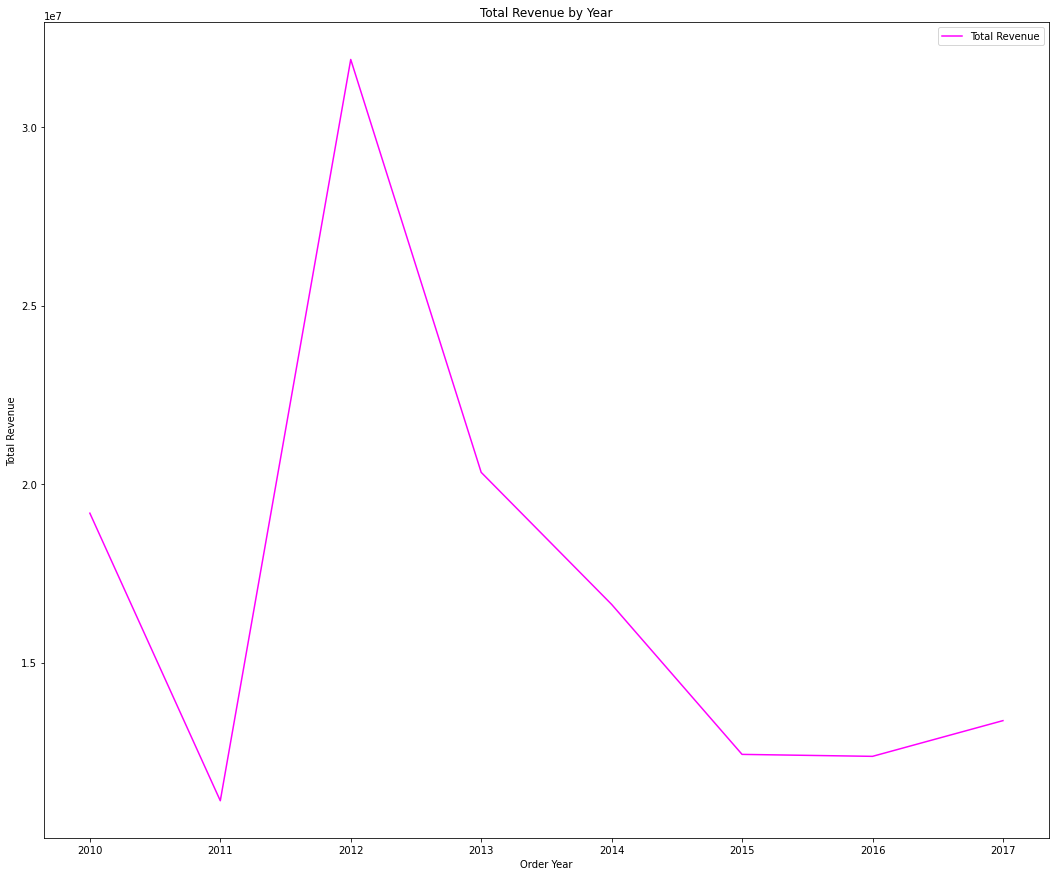

In [159]:
fig, ax = plt.subplots(figsize=(18, 15))
df_11.plot(kind='line',color=['Magenta'],ax=ax)
plt.title('Total Revenue by Year')
plt.xlabel('Order Year')
plt.ylabel('Total Revenue')
plt.legend(loc='upper right');

In [160]:
# Year '2010' has the maximum consolidated 'Total Revenue' of '19186024.92'.

In [161]:
df_11 = inp1.groupby(['Order Year'])[['Total Revenue']].mean()
df_11 = df_11.round(2)
print(df_11)

            Total Revenue
Order Year               
2010           1918602.49
2011            927430.51
2012           1449938.39
2013           1694204.06
2014           1108680.96
2015           1129816.62
2016           1237286.72
2017           1671677.45


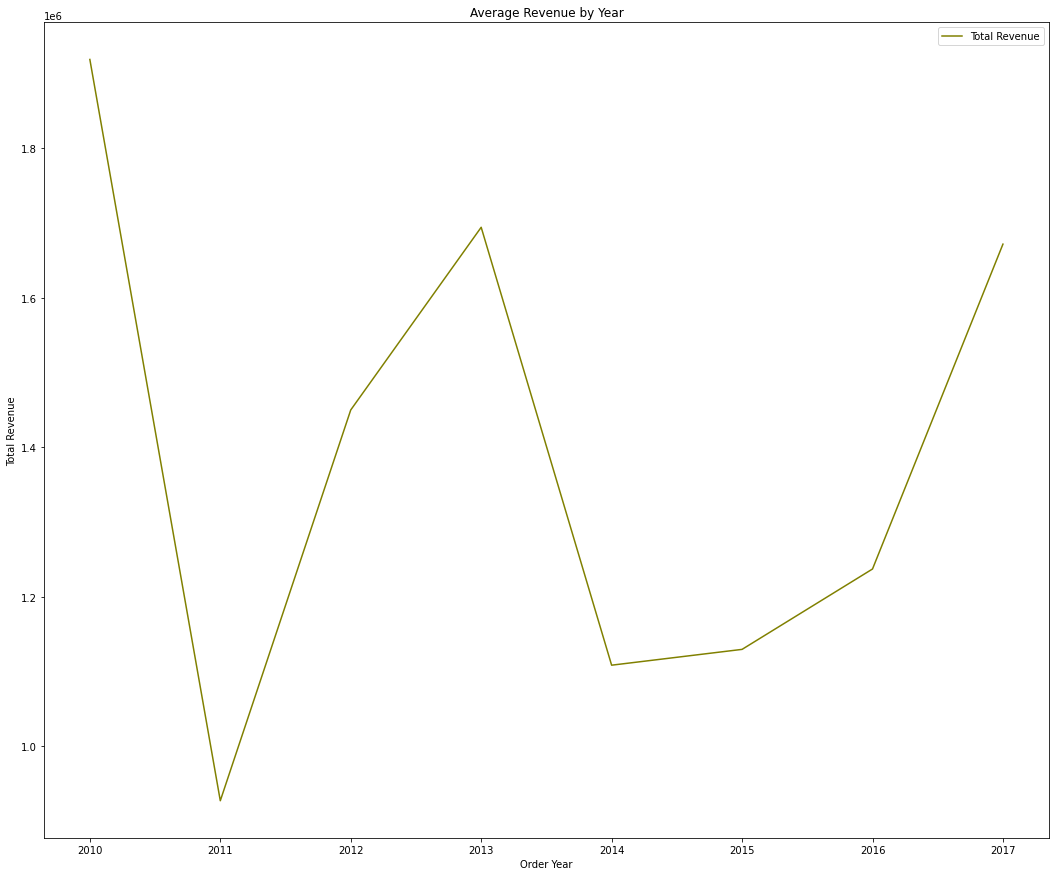

In [162]:
fig, ax = plt.subplots(figsize=(18, 15))
df_11.plot(kind='line',color=['Olive'],ax=ax)
plt.title('Average Revenue by Year')
plt.xlabel('Order Year')
plt.ylabel('Total Revenue')
plt.legend(loc='upper right');

In [163]:
# Year '2010' has an average consolidated 'Total Revenue' of '1918602.49'.

In [164]:
df_12 = inp1.groupby(['Order Year'])[['Total Profit']].sum()
df_12 = df_12.round(2)
print(df_12)

            Total Profit
Order Year              
2010          6629567.43
2011          2741008.23
2012          9213010.12
2013          6715420.04
2014          5879461.68
2015          3996539.44
2016          4903838.01
2017          4089353.45


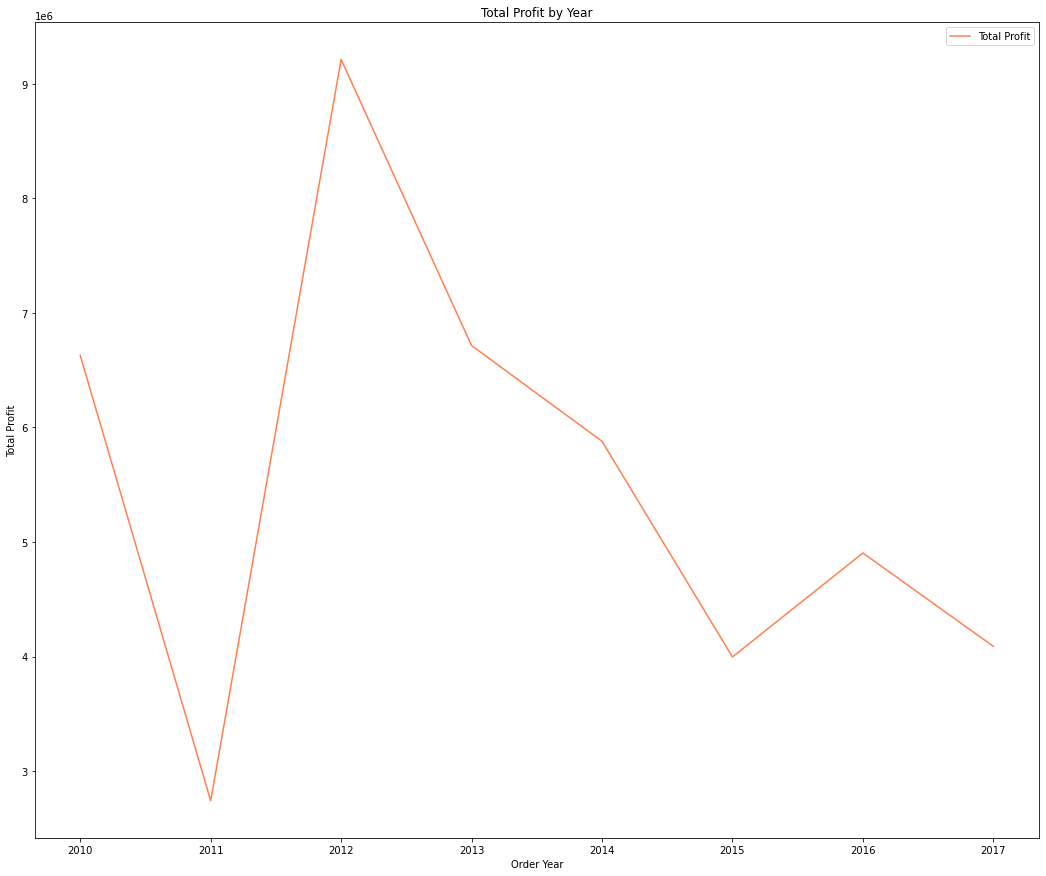

In [165]:
fig, ax = plt.subplots(figsize=(18, 15))
df_12.plot(kind='line',color=['Coral'],ax=ax)
plt.title('Total Profit by Year')
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.legend(loc='upper right');

In [166]:
# Year '2012' has the maximum consolidated 'Total Profit' of '9213010.12'.

In [167]:
df_12 = inp1.groupby(['Order Year'])[['Total Profit']].mean()
df_12 = df_12.round(2)
print(df_12)

            Total Profit
Order Year              
2010           662956.74
2011           228417.35
2012           418773.19
2013           559618.34
2014           391964.11
2015           363321.77
2016           490383.80
2017           511169.18


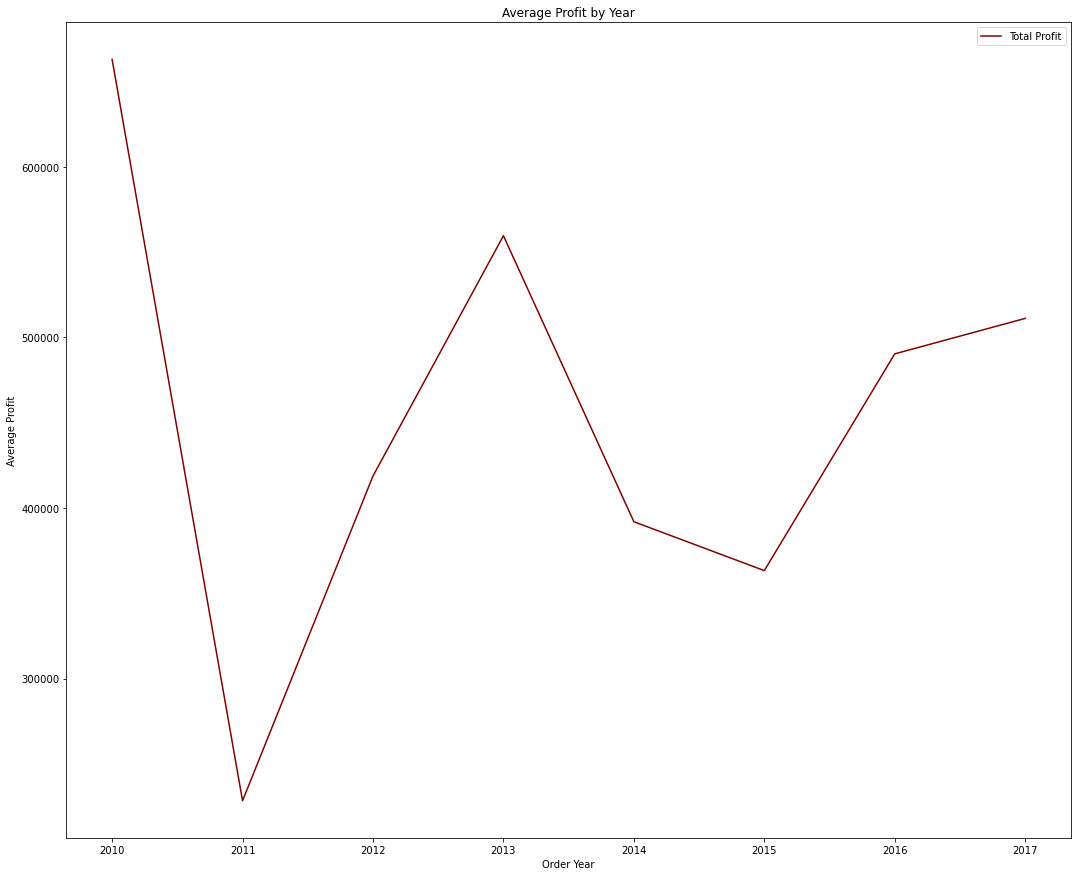

In [168]:
fig, ax = plt.subplots(figsize=(18, 15))
df_12.plot(kind='line',color=['Maroon'],ax=ax)
plt.title('Average Profit by Year')
plt.xlabel('Order Year')
plt.ylabel('Average Profit')
plt.legend(loc='upper right');

In [169]:
# Year '2010' has the highest average consolidated 'Total Profit' of '662956.74'.

In [170]:
df_13 = inp1.groupby(['Order Year'])[['Total Cost']].sum()
df_13 = df_13.round(2)
print(df_13)

             Total Cost
Order Year             
2010        12556457.49
2011         8388157.84
2012        22685634.40
2013        13615028.62
2014        10750752.75
2015         8431443.42
2016         7469029.21
2017         9284066.18


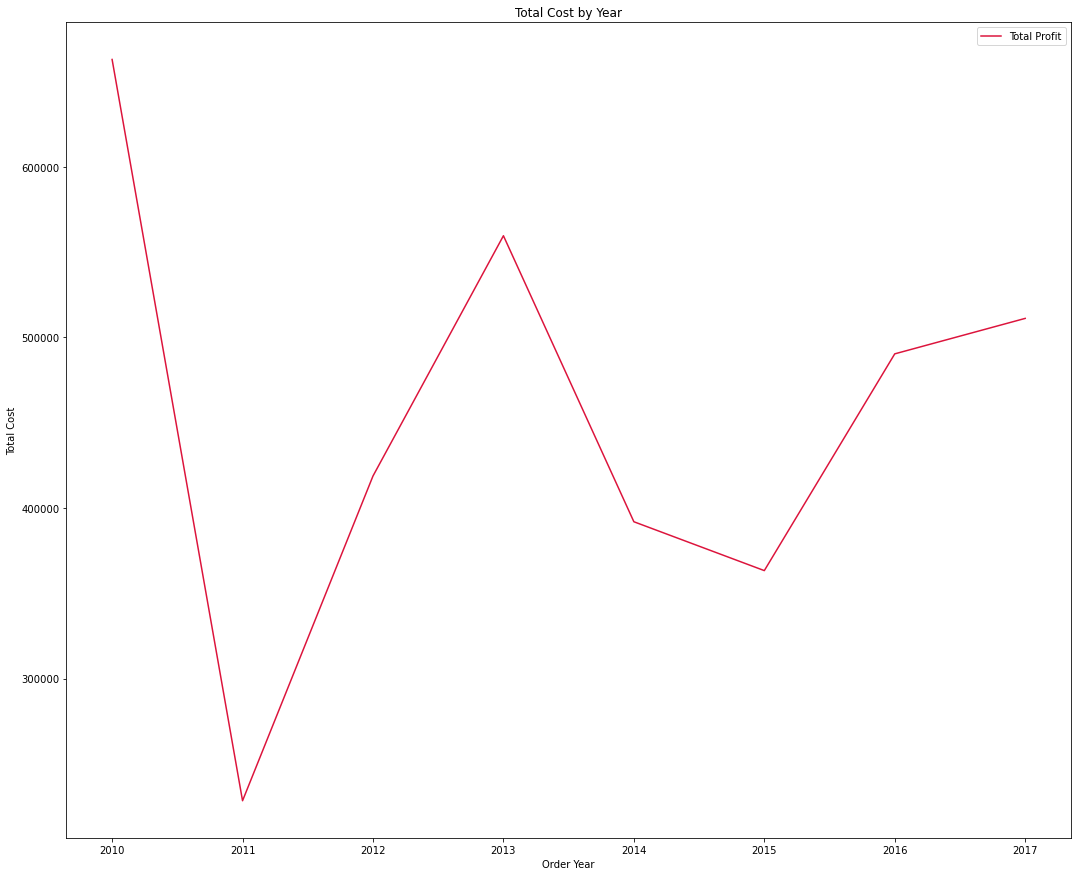

In [171]:
fig, ax = plt.subplots(figsize=(18, 15))
df_12.plot(kind='line',color=['Crimson'],ax=ax)
plt.title('Total Cost by Year')
plt.xlabel('Order Year')
plt.ylabel('Total Cost')
plt.legend(loc='upper right');

In [172]:
# Year '2012' has the maximum consolidated 'Total Cost' of '22685634.40'.

In [173]:
df_13 = inp1.groupby(['Order Year'])[['Total Cost']].mean()
df_13 = df_13.round(2)
print(df_13)

            Total Cost
Order Year            
2010        1255645.75
2011         699013.15
2012        1031165.20
2013        1134585.72
2014         716716.85
2015         766494.86
2016         746902.92
2017        1160508.27


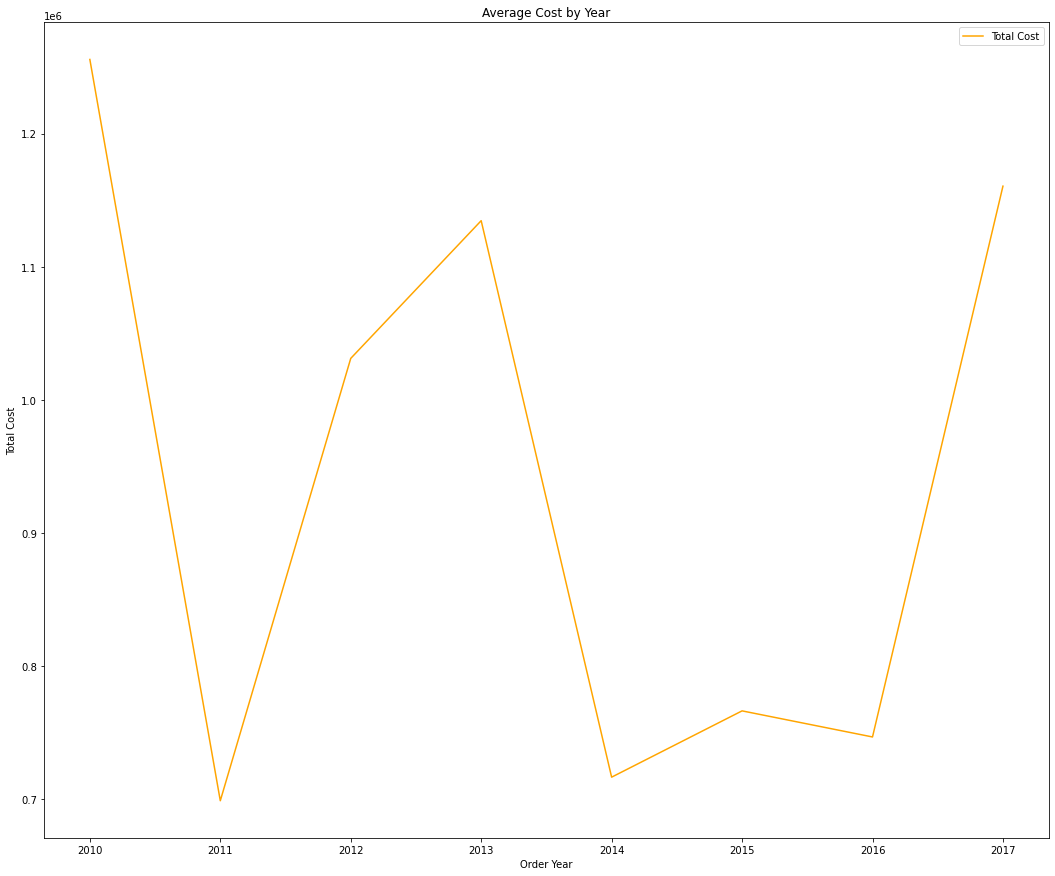

In [174]:
fig, ax = plt.subplots(figsize=(18, 15))
df_13.plot(kind='line',color=['Orange'],ax=ax)
plt.title('Average Cost by Year')
plt.xlabel('Order Year')
plt.ylabel('Total Cost')
plt.legend(loc='upper right');

In [175]:
# Year '2010' has the highest average consolidated 'Total Cost' of '1255645.75'.

In [176]:
df_14 = inp1.groupby(['Order Year'])[['Order ID']].count()
df_14 = df_14.round(2)
print(df_14)

            Order ID
Order Year          
2010              10
2011              12
2012              22
2013              12
2014              15
2015              11
2016              10
2017               8


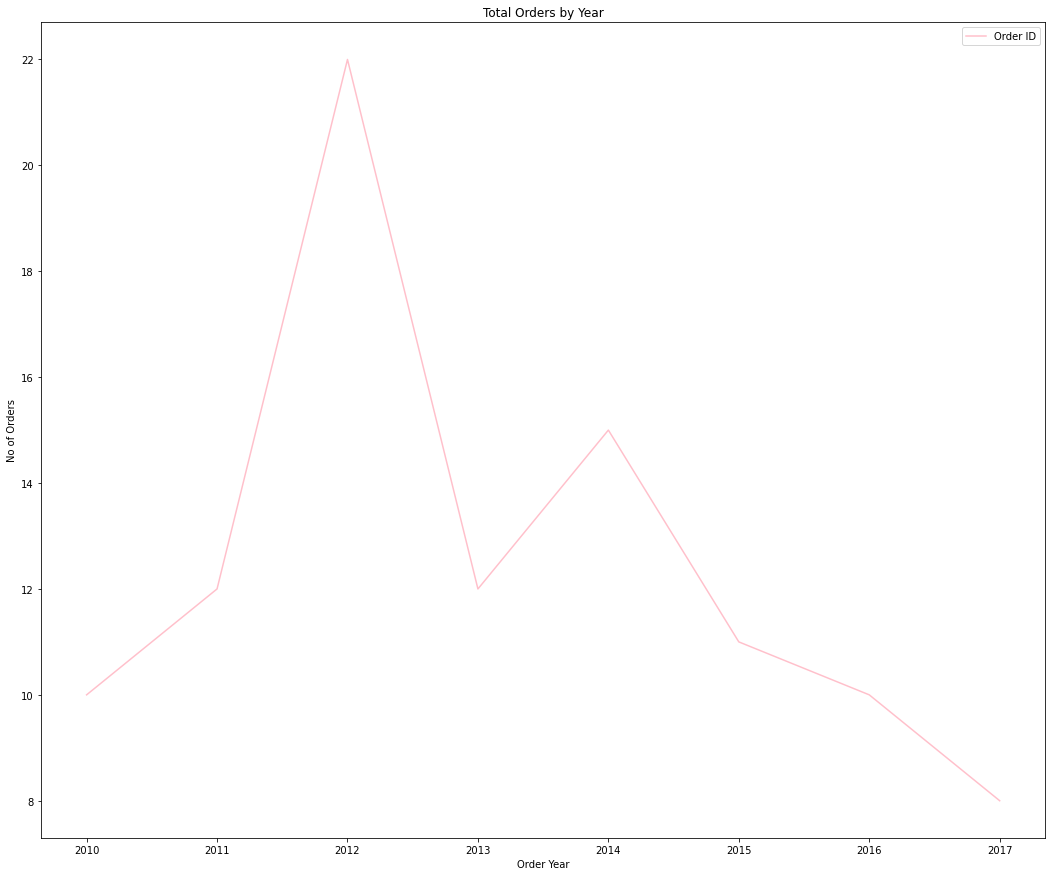

In [177]:
fig, ax = plt.subplots(figsize=(18, 15))
df_14.plot(kind='line',color=['Pink'],ax=ax)
plt.title('Total Orders by Year')
plt.xlabel('Order Year')
plt.ylabel('No of Orders')
plt.legend(loc='upper right');

In [178]:
# Year '2012' has the maximum number of Orders'22'.

In [179]:
df_15 = inp1.groupby(['Order Year'])[['Days Difference']].mean()
df_15 = df_15.round(0)
print(df_15)

            Days Difference
Order Year                 
2010                   26.0
2011                   25.0
2012                   22.0
2013                   25.0
2014                   23.0
2015                   26.0
2016                   22.0
2017                   17.0


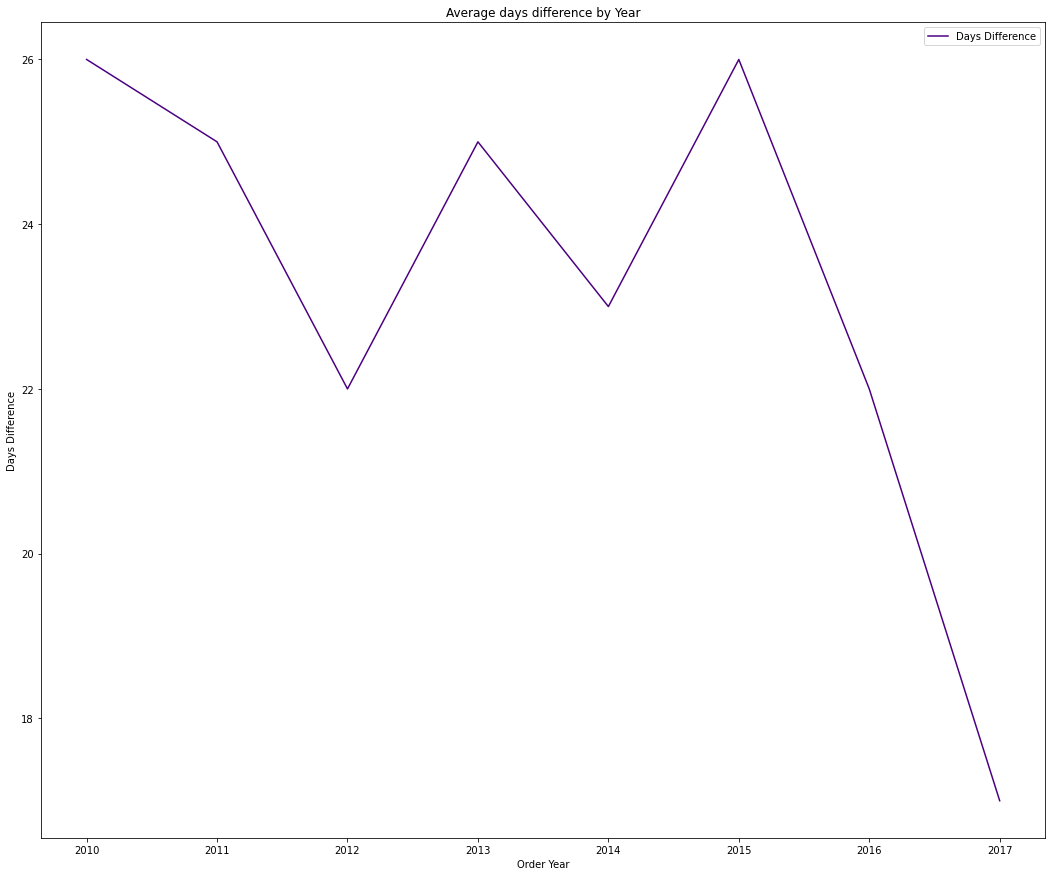

In [180]:
fig, ax = plt.subplots(figsize=(18, 15))
df_15.plot(kind='line',color=['Indigo'],ax=ax)
plt.title('Average days difference by Year')
plt.xlabel('Order Year')
plt.ylabel('Days Difference')
plt.legend(loc='upper right');

In [181]:
# Average number of days difference between the 'Order date' & 'Ship date' was highest in 2010 & 2015 with '26' days.

In [182]:
df_2010 = inp1[inp1['Order Year'] == 2010]

In [183]:
df_grouped = df_2010.groupby(['Region','Country','Sales Channel','Order Priority','Order Year','Order Quarter','Order Month','Units Sold','Item Type'])['Total Revenue','Total Profit'].sum().reset_index()

In [184]:
df_sorted = df_grouped.sort_values(by='Total Profit', ascending=False)

In [185]:
print(df_sorted)

                         Region       Country Sales Channel Order Priority  \
5                        Europe       Romania        Online              H   
7  Middle East and North Africa    Azerbaijan        Online              M   
4                        Europe     Lithuania       Offline              H   
2         Australia and Oceania        Tuvalu       Offline              H   
1         Australia and Oceania          Fiji       Offline              C   
0                          Asia  Turkmenistan       Offline              L   
8  Middle East and North Africa         Libya       Offline              H   
3                        Europe       Albania        Online              C   
9            Sub-Saharan Africa          Mali        Online              L   
6                        Europe   Switzerland        Online              M   

   Order Year  Order Quarter  Order Month  Units Sold        Item Type  \
5        2010              4           11        7910        Cosmet

In [186]:
# In year '2010' ,Country 'Romania' Region'Europe' with item type'Cosmetics' made the maximum Total Profit of '1375311.70'
# while the maximum highest Total Revenue of '5396577.27' was for 
#Country 'Lithuania' Region 'Europe' with item type 'Office Supplies'.

In [187]:
df_2011 = inp1[inp1['Order Year'] == 2011]

In [188]:
df_grouped = df_2011.groupby(['Region','Country','Sales Channel','Order Priority','Order Year','Order Quarter','Order Month','Units Sold','Item Type'])['Total Revenue','Total Profit'].sum().reset_index()

In [189]:
df_sorted = df_grouped.sort_values(by='Total Profit', ascending=False)

In [190]:
print(df_sorted)

                               Region                           Country  \
6                  Sub-Saharan Africa                          Cameroon   
5                  Sub-Saharan Africa                            Angola   
10                 Sub-Saharan Africa                      Sierra Leone   
1                                Asia                              Laos   
11                 Sub-Saharan Africa                            Zambia   
9                  Sub-Saharan Africa             Sao Tome and Principe   
3   Central America and the Caribbean                         Nicaragua   
7                  Sub-Saharan Africa  Democratic Republic of the Congo   
8                  Sub-Saharan Africa                              Mali   
2                                Asia                          Malaysia   
4        Middle East and North Africa                             Syria   
0                                Asia                        Kyrgyzstan   

   Sales Channel Order P

In [191]:
# In year '2011' ,Country 'Cameroon' Region 'Sub-Saharan Africa ' with item type 'Office Supplies' 
# made the maximum Total Profit of '696647.50 & Total Revenue of  '3593376.78'.

In [192]:
df_2012 = inp1[inp1['Order Year']==2012]

In [193]:
df_grouped = df_2012.groupby(['Region','Country','Sales Channel','Order Priority','Order Year','Order Quarter','Order Month','Units Sold','Item Type'])['Total Revenue','Total Profit'].sum().reset_index()

In [194]:
df_sorted = df_grouped.sort_values(by='Total Profit', ascending=False)

In [195]:
print(df_sorted)

                               Region         Country Sales Channel  \
8                              Europe     Switzerland       Offline   
19                 Sub-Saharan Africa      Mozambique       Offline   
0                                Asia          Brunei        Online   
5                              Europe          Monaco       Offline   
7                              Europe           Spain       Offline   
12       Middle East and North Africa         Lebanon        Online   
14                 Sub-Saharan Africa    Burkina Faso        Online   
3                              Europe        Bulgaria        Online   
17                 Sub-Saharan Africa           Kenya        Online   
21                 Sub-Saharan Africa      The Gambia       Offline   
1               Australia and Oceania      East Timor        Online   
15                 Sub-Saharan Africa   Cote d'Ivoire        Online   
10       Middle East and North Africa      Azerbaijan        Online   
2   Ce

In [196]:
# In year '2012' ,Country 'Switzerland' Region 'Europe' with item type 'Cosmetics' 
# made the maximum Total Profit of '1505888.07' while the maximum highest Total Revenue of '4368316.68' was for 
#Country 'Brunei' Region 'Asia' with item type 'Office Supplies'.

In [197]:
df_2013 = inp1[inp1['Order Year']==2013]

In [198]:
df_grouped = df_2013.groupby(['Region','Country','Sales Channel','Order Priority','Order Year','Order Quarter','Order Month','Units Sold','Item Type'])['Total Revenue','Total Profit'].sum().reset_index()

In [199]:
df_sorted = df_grouped.sort_values(by='Total Profit', ascending=False)

In [200]:
print(df_sorted)

                               Region                Country Sales Channel  \
5        Middle East and North Africa               Pakistan       Offline   
2               Australia and Oceania                 Samoa         Online   
8                  Sub-Saharan Africa                 Rwanda       Offline   
9                  Sub-Saharan Africa                 Rwanda       Offline   
0                                Asia           Turkmenistan        Online   
4                              Europe             San Marino        Online   
6        Middle East and North Africa           Saudi Arabia        Online   
3   Central America and the Caribbean                  Haiti       Offline   
1               Australia and Oceania              Australia       Offline   
11                 Sub-Saharan Africa            South Sudan       Offline   
7                  Sub-Saharan Africa                Lesotho        Online   
10                 Sub-Saharan Africa  Sao Tome and Principe    

In [201]:
# In year '2013' ,Country 'Pakistan' Region 'Middle East and North Africa' with item type 'Cosmetics' 
# made the maximum Total Profit of '1719922.04' & Total Revenue of '4324782.40'.

In [202]:
df_2014 = inp1[inp1['Order Year']==2014]

In [203]:
df_grouped = df_2014.groupby(['Region','Country','Sales Channel','Order Priority','Order Year','Order Quarter','Order Month','Units Sold','Item Type'])['Total Revenue','Total Profit'].sum().reset_index()

In [204]:
df_sorted = df_grouped.sort_values(by='Total Profit', ascending=False)

In [205]:
print(df_sorted)

                   Region                         Country Sales Channel  \
11     Sub-Saharan Africa                        Djibouti       Offline   
9           North America                          Mexico       Offline   
7                  Europe                          Norway        Online   
13     Sub-Saharan Africa                         Senegal        Online   
5                  Europe                       Macedonia       Offline   
14     Sub-Saharan Africa                      The Gambia       Offline   
10     Sub-Saharan Africa                      Cape Verde       Offline   
8                  Europe                          Russia       Offline   
1   Australia and Oceania                       Australia       Offline   
2   Australia and Oceania  Federated States of Micronesia        Online   
0                    Asia                        Mongolia       Offline   
6                  Europe                          Norway       Offline   
12     Sub-Saharan Africa

In [206]:
# In year '2014' ,Country 'Djibouti' Region 'Sub-Saharan Africa' with item type 'Cosmetics' 
# made the maximum Total Profit of '1254472.05' while the maximum highest Total Revenue of '5513227.50' was for 
#Country 'Mexico' Region 'North America' with item type 'Household' .

In [207]:
df_2015 = inp1[inp1['Order Year']==2015]

In [208]:
df_grouped = df_2015.groupby(['Region','Country','Sales Channel','Order Priority','Order Year','Order Quarter','Order Month','Units Sold','Item Type'])['Total Revenue','Total Profit'].sum().reset_index()

In [209]:
df_sorted = df_grouped.sort_values(by='Total Profit', ascending=False)

In [210]:
print(df_sorted)

                          Region                Country Sales Channel  \
0                           Asia                Myanmar       Offline   
9             Sub-Saharan Africa             Madagascar       Offline   
4                         Europe                Austria       Offline   
1                           Asia                Myanmar        Online   
2          Australia and Oceania              Australia        Online   
3          Australia and Oceania        Solomon Islands        Online   
10            Sub-Saharan Africa  Republic of the Congo       Offline   
7                  North America                 Mexico       Offline   
5                         Europe               Portugal        Online   
8             Sub-Saharan Africa               Cameroon       Offline   
6   Middle East and North Africa                  Libya        Online   

   Order Priority  Order Year  Order Quarter  Order Month  Units Sold  \
0               H        2015              1      

In [211]:
# In year '2015' ,Country 'Myanmar' Region 'Asia' with item type 'Household' 
# made the maximum Total Profit of '1367272.50' & Total Revenue of '5513227.50'.

In [212]:
df_2016 = inp1[inp1['Order Year']==2016]

In [213]:
df_grouped = df_2016.groupby(['Region','Country','Sales Channel','Order Priority','Order Year','Order Quarter','Order Month','Units Sold','Item Type'])['Total Revenue','Total Profit'].sum().reset_index()

In [214]:
df_sorted = df_grouped.sort_values(by='Total Profit', ascending=False)

In [215]:
print(df_sorted)

                              Region       Country Sales Channel  \
3                             Europe       Iceland        Online   
0                               Asia     Sri Lanka       Offline   
6       Middle East and North Africa          Iran        Online   
1  Central America and the Caribbean        Belize       Offline   
4                             Europe      Moldova         Online   
2  Central America and the Caribbean      Honduras        Online   
9                 Sub-Saharan Africa  Sierra Leone       Offline   
8                 Sub-Saharan Africa  Sierra Leone       Offline   
7                 Sub-Saharan Africa       Comoros       Offline   
5                             Europe      Slovenia       Offline   

  Order Priority  Order Year  Order Quarter  Order Month  Units Sold  \
3              C        2016              4           12        8867   
0              M        2016              4           11        6952   
6              H        2016       

In [216]:
# In year '2016' ,Country 'Iceland' Region 'Europe' with item type 'Cosmetics' 
# made the maximum Total Profit of '1541705.29' & Total Revenue of '3876652.40'.

In [217]:
df_2017 = inp1[inp1['Order Year']==2017]

In [218]:
df_grouped = df_2017.groupby(['Region','Country','Sales Channel','Order Priority','Order Year','Order Quarter','Order Month','Units Sold','Item Type'])['Total Revenue','Total Profit'].sum().reset_index()

In [219]:
df_sorted = df_grouped.sort_values(by='Total Profit', ascending=False)

In [220]:
print(df_sorted)

                              Region     Country Sales Channel Order Priority  \
2  Central America and the Caribbean    Honduras       Offline              H   
4                 Sub-Saharan Africa    Djibouti        Online              H   
0                               Asia  Bangladesh        Online              L   
5                 Sub-Saharan Africa    Djibouti        Online              M   
3                             Europe      France        Online              H   
7                 Sub-Saharan Africa  The Gambia        Online              M   
1  Central America and the Caribbean  Costa Rica       Offline              L   
6                 Sub-Saharan Africa       Niger        Online              H   

   Order Year  Order Quarter  Order Month  Units Sold      Item Type  \
2        2017              1            2        8974      Household   
4        2017              2            5        8656         Cereal   
0        2017              1            1        8263 

In [221]:
# In year '2017' ,Country 'Honduras' Region 'Central America and the Caribbean' with item type 'Household' 
# made the maximum Total Profit of '1487261.02' & 'Total Revenue' of '5997054.98'.


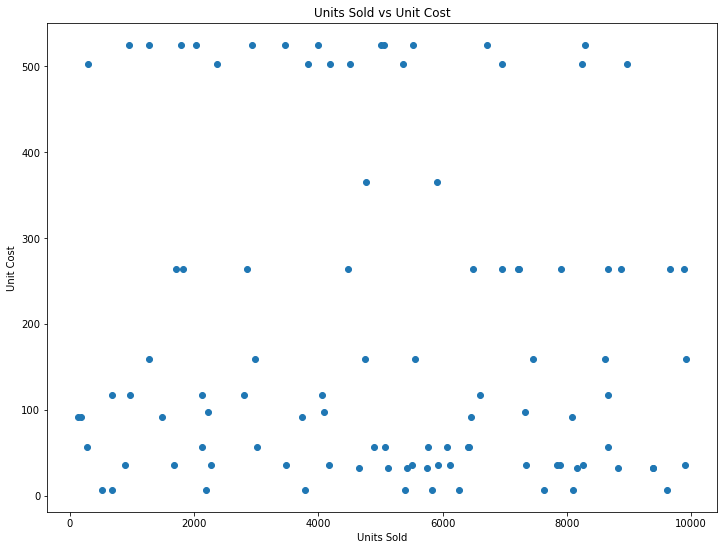

In [222]:
# Scatter plot 
fig= plt.subplots(figsize=(12, 9))
plt.scatter(inp1['Units Sold'], inp1['Unit Cost'])
plt.title('Units Sold vs Unit Cost')
plt.xlabel('Units Sold')
plt.ylabel('Unit Cost')
plt.show()

In [223]:
# No coorelation is observed between Units Sold & Unit Cost.

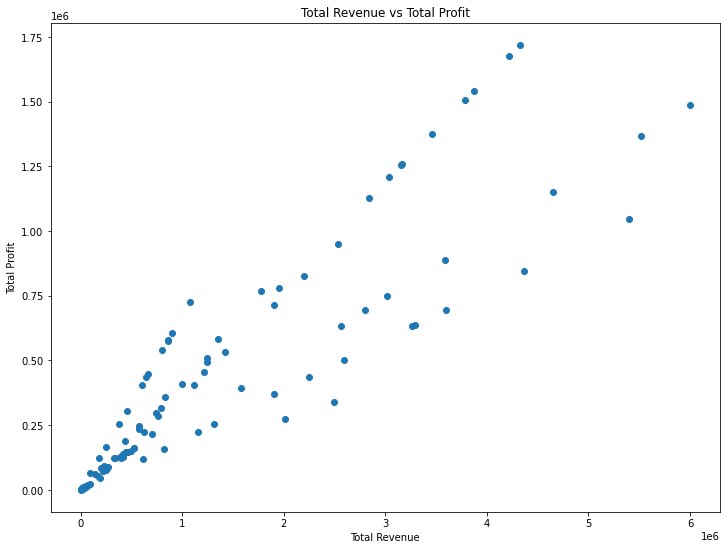

In [224]:
# Scatter plot 
fig= plt.subplots(figsize=(12, 9))
plt.scatter(inp1['Total Revenue'], inp1['Total Profit'])
plt.title('Total Revenue vs Total Profit')
plt.xlabel('Total Revenue')
plt.ylabel('Total Profit')
plt.show()

In [225]:
# Linear coorelation is observed between Total Revenue & Total Profit.

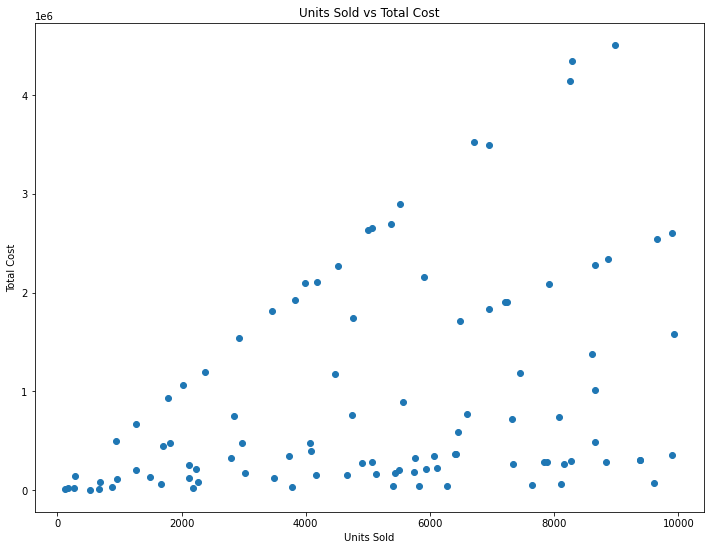

In [226]:
# Scatter plot 
fig= plt.subplots(figsize=(12, 9))
plt.scatter(inp1['Units Sold'], inp1['Total Cost'])
plt.title('Units Sold vs Total Cost')
plt.xlabel('Units Sold')
plt.ylabel('Total Cost')
plt.show()

In [227]:
# Linear coorelation is observed between Units Sold & Total Cost.

In [228]:
df_grouped = inp1.groupby(['Region','Country','Sales Channel','Order Priority','Order Year','Order Quarter','Order Month','Units Sold','Item Type'])['Total Revenue','Total Profit'].sum().reset_index()

In [229]:
df_sorted = df_grouped.sort_values(by='Total Profit', ascending=False)

In [230]:
print(df_sorted.head(10))

                               Region      Country Sales Channel  \
58       Middle East and North Africa     Pakistan       Offline   
19              Australia and Oceania       Samoa         Online   
34                             Europe      Iceland        Online   
48                             Europe  Switzerland       Offline   
26  Central America and the Caribbean     Honduras       Offline   
42                             Europe      Romania        Online   
6                                Asia      Myanmar       Offline   
51       Middle East and North Africa   Azerbaijan        Online   
72                 Sub-Saharan Africa     Djibouti       Offline   
8                                Asia    Sri Lanka       Offline   

   Order Priority  Order Year  Order Quarter  Order Month  Units Sold  \
58              L        2013              3            7        9892   
19              H        2013              3            7        9654   
34              C        2016   

In [231]:
df_grouped = inp1.groupby(['Region','Country','Sales Channel','Order Priority','Order Year','Order Quarter','Order Month','Units Sold','Item Type'])['Total Revenue','Total Profit'].sum().reset_index()

In [232]:
df_sorted = df_grouped.sort_values(by='Total Revenue', ascending=False)

In [233]:
print(df_sorted.head(10))

                               Region      Country Sales Channel  \
26  Central America and the Caribbean     Honduras       Offline   
6                                Asia      Myanmar       Offline   
35                             Europe    Lithuania       Offline   
61                      North America       Mexico       Offline   
1                                Asia       Brunei        Online   
58       Middle East and North Africa     Pakistan       Offline   
19              Australia and Oceania       Samoa         Online   
34                             Europe      Iceland        Online   
48                             Europe  Switzerland       Offline   
67                 Sub-Saharan Africa     Cameroon        Online   

   Order Priority  Order Year  Order Quarter  Order Month  Units Sold  \
26              H        2017              1            2        8974   
6               H        2015              1            1        8250   
35              H        2010   

In [234]:
df_grouped = inp1.groupby(['Region','Country','Sales Channel','Order Priority','Order Year','Order Quarter','Order Month','Units Sold','Item Type'])['Total Revenue','Total Profit','Total Cost'].sum().reset_index()

In [235]:
df_sorted = df_grouped.sort_values(by='Total Cost', ascending=False)

In [236]:
print(df_sorted.head(10))

                               Region       Country Sales Channel  \
26  Central America and the Caribbean      Honduras       Offline   
35                             Europe     Lithuania       Offline   
6                                Asia       Myanmar       Offline   
1                                Asia        Brunei        Online   
61                      North America        Mexico       Offline   
67                 Sub-Saharan Africa      Cameroon        Online   
82                 Sub-Saharan Africa    Mozambique       Offline   
86                 Sub-Saharan Africa        Rwanda       Offline   
10                               Asia  Turkmenistan        Online   
58       Middle East and North Africa      Pakistan       Offline   

   Order Priority  Order Year  Order Quarter  Order Month  Units Sold  \
26              H        2017              1            2        8974   
35              H        2010              4           10        8287   
6               H    

In [237]:
# Cleaned dataset converted to excel for Power BI analysis
inp1.to_excel('inp1.xlsx')